# 1. Business Problem


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -u "/content/drive/MyDrive/colabfold/act_test.csv.zip" -d "/content/drive/MyDrive/colabfold"

Archive:  /content/drive/MyDrive/colabfold/act_test.csv.zip
  inflating: /content/drive/MyDrive/colabfold/act_test.csv  


In [ ]:
!unzip -u "/content/drive/MyDrive/colabfold/act_train.csv.zip" -d "/content/drive/MyDrive/colabfold"

Archive:  /content/drive/MyDrive/colabfold/act_train.csv.zip
  inflating: /content/drive/MyDrive/colabfold/act_train.csv  


In [ ]:
!unzip -u "/content/drive/MyDrive/colabfold/people.csv.zip" -d "/content/drive/MyDrive/colabfold"

Archive:  /content/drive/MyDrive/colabfold/people.csv.zip
  inflating: /content/drive/MyDrive/colabfold/people.csv  


# RedHat

<p>
Like most companies, Red Hat is able to gather a great deal of information over time about the behavior of individuals who interact with them. They’re in search of better methods of using this behavioral data to predict which individuals they should approach—and even when and how to approach them.
</p>

<p>
In this competition, Kagglers are challenged to create a classification algorithm that accurately identifies which customers have the most potential business value for Red Hat based on their characteristics and activities.
</p>
<p>
With an improved prediction model in place, Red Hat will be able to more efficiently prioritize resources to generate more business and better serve their customers.
</p>

# 1.2 Problem Statement

<p>
Red hat has provided  masked data about its customers and their activities on their website.Based n these values we have to predict wheather a particular customer  have any business value or not.
</p>

<h2>1.3 Real world/Business Objectives and constraints  </h2>

Objectives:
1. Predict the outcome value that a customer has any business value or not.
2. Minimize the difference between predicted and actual outcome. (ROC score)
<br>

Constraints:
1. Some form of interpretability.

<h1> 2. Machine Learning Problem </h1>

# About RedHat dataset

<p>
This competition uses two separate data files that may be joined together to create a single, unified data table: a people file and an activity file.
</p>
 
<p> 
The people file contains all of the unique people (and the corresponding characteristics) that have performed activities over time. Each row in the people file represents a unique person. Each person has a unique people_id.
</p>

<p>
The activity file contains all of the unique activities (and the corresponding activity characteristics) that each person has performed over time. Each row in the activity file represents a unique activity performed by a person on a certain date. Each activity has a unique activity_id.
</p>
  
<p>  
The challenge of this competition is to predict the potential business value of a person who has performed a specific activity. The business value outcome is defined by a yes/no field attached to each unique activity in the activity file. The outcome field indicates whether or not each person has completed the outcome within a fixed window of time after each unique activity was performed.
</p>

<p>
The activity file contains several different categories of activities. Type 1 activities are different from type 2-7 activities because there are more known characteristics associated with type 1 activities (nine in total) than type 2-7 activities (which have only one associated characteristic).
</p>

<p>
To develop a predictive model with this data, you will likely need to join the files together into a single data set. The two files can be joined together using person_id as the common key. All variables are categorical, with the exception of 'char_38' in the people file, which is a continuous numerical variable.
</p>

<h2>2.2 Mapping the real world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

<pre>
For a given data about customer and his activities we need to predict the business outcome. 
The given problem is a Classification problem.
</pre>

<h3> 2.2.2 Performance metric </h3>

<pre>
As this is a classification problem following metrics will help in better prediction.
</pre>
<ul>
<li> F1 Score: This metric tries to create a balance between precision and recall.Here we are interested in more numbers of correct predictions. </li>
<li> Log loss: As the target variable has binary value,log loss will help in better prediction. </li>
<li> ROC AUC Score: It will help in predicting the quality of model prediction. </li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Preprocessing</h2> 

In [2]:
train_dat=pd.read_csv("act_train.csv")
people_dat=pd.read_csv("people.csv")
test_dat=pd.read_csv("act_test.csv")

In [ ]:
print("Shape of people data is",people_dat.shape)
print("Shape of train data is",train_dat.shape)
print("Shape of test data is",test_dat.shape)

In [ ]:
people_dat.head()

people_id  char_1      group_1  char_2        date   char_3   char_4  \
0     ppl_100  type 2  group 17304  type 2  2021-06-29   type 5   type 5   
1  ppl_100002  type 2   group 8688  type 3  2021-01-06  type 28   type 9   
2  ppl_100003  type 2  group 33592  type 3  2022-06-10   type 4   type 8   
3  ppl_100004  type 2  group 22593  type 3  2022-07-20  type 40  type 25   
4  ppl_100006  type 2   group 6534  type 3  2022-07-27  type 40  type 25   

   char_5  char_6   char_7  ... char_29 char_30  char_31  char_32  char_33  \
0  type 5  type 3  type 11  ...   False    True     True    False    False   
1  type 5  type 3  type 11  ...   False    True     True     True     True   
2  type 5  type 2   type 5  ...   False   False     True     True     True   
3  type 9  type 4  type 16  ...    True    True     True     True     True   
4  type 9  type 3   type 8  ...   False   False     True    False    False   

   char_34  char_35  char_36  char_37  char_38  
0     True     True     True    False       36  
1     True     True     True    False       76  
2     True    False     True     True       99  
3     True     True     True     True       76  
4    False     True     True    False       84  

[5 rows x 41 columns]

In [ ]:
train_dat.head()

people_id   activity_id        date activity_category char_1 char_2 char_3  \
0   ppl_100  act2_1734928  2023-08-26            type 4    NaN    NaN    NaN   
1   ppl_100  act2_2434093  2022-09-27            type 2    NaN    NaN    NaN   
2   ppl_100  act2_3404049  2022-09-27            type 2    NaN    NaN    NaN   
3   ppl_100  act2_3651215  2023-08-04            type 2    NaN    NaN    NaN   
4   ppl_100  act2_4109017  2023-08-26            type 2    NaN    NaN    NaN   

  char_4 char_5 char_6 char_7 char_8 char_9  char_10  outcome  
0    NaN    NaN    NaN    NaN    NaN    NaN  type 76        0  
1    NaN    NaN    NaN    NaN    NaN    NaN   type 1        0  
2    NaN    NaN    NaN    NaN    NaN    NaN   type 1        0  
3    NaN    NaN    NaN    NaN    NaN    NaN   type 1        0  
4    NaN    NaN    NaN    NaN    NaN    NaN   type 1        0

In [ ]:
test_dat.head()

people_id   activity_id        date activity_category   char_1   char_2  \
0  ppl_100004   act1_249281  2022-07-20            type 1   type 5  type 10   
1  ppl_100004   act2_230855  2022-07-20            type 5      NaN      NaN   
2   ppl_10001   act1_240724  2022-10-14            type 1  type 12   type 1   
3   ppl_10001    act1_83552  2022-11-27            type 1  type 20  type 10   
4   ppl_10001  act2_1043301  2022-10-15            type 5      NaN      NaN   

   char_3  char_4  char_5  char_6  char_7   char_8   char_9    char_10  
0  type 5  type 1  type 6  type 1  type 1   type 7   type 4        NaN  
1     NaN     NaN     NaN     NaN     NaN      NaN      NaN   type 682  
2  type 5  type 4  type 6  type 1  type 1  type 13  type 10        NaN  
3  type 5  type 4  type 6  type 1  type 1   type 5   type 5        NaN  
4     NaN     NaN     NaN     NaN     NaN      NaN      NaN  type 3015

<h3>3.1.1 Merging people data with train and test data</h3>

In [3]:
train_dat.rename(columns={"date": "actv_date"},inplace=True)
people_dat.rename(columns={"date": "ppl_date"},inplace=True)
test_dat.rename(columns={"date": "actv_date"},inplace=True)

In [4]:
#Combining each of train & test data with people data
tot1_dat=pd.merge(people_dat,train_dat,on="people_id")
tot2_dat=pd.merge(people_dat,test_dat,on="people_id")

In [10]:
print("Shape of new train data is",tot1_dat.shape)
print("Shape of new test data is",tot2_dat.shape)

Shape of new train data is (2197291, 55)
Shape of new test data is (498687, 54)


In [5]:
tot2_dat.to_csv("Test_data_full.csv")

In [ ]:
tot1_dat.head()

people_id char_1_x      group_1 char_2_x    ppl_date char_3_x char_4_x  \
0   ppl_100   type 2  group 17304   type 2  2021-06-29   type 5   type 5   
1   ppl_100   type 2  group 17304   type 2  2021-06-29   type 5   type 5   
2   ppl_100   type 2  group 17304   type 2  2021-06-29   type 5   type 5   
3   ppl_100   type 2  group 17304   type 2  2021-06-29   type 5   type 5   
4   ppl_100   type 2  group 17304   type 2  2021-06-29   type 5   type 5   

  char_5_x char_6_x char_7_x  ... char_2_y char_3_y  char_4_y  char_5_y  \
0   type 5   type 3  type 11  ...      NaN      NaN       NaN       NaN   
1   type 5   type 3  type 11  ...      NaN      NaN       NaN       NaN   
2   type 5   type 3  type 11  ...      NaN      NaN       NaN       NaN   
3   type 5   type 3  type 11  ...      NaN      NaN       NaN       NaN   
4   type 5   type 3  type 11  ...      NaN      NaN       NaN       NaN   

   char_6_y  char_7_y  char_8_y  char_9_y  char_10_y  outcome  
0       NaN       NaN       NaN       NaN    type 76        0  
1       NaN       NaN       NaN       NaN     type 1        0  
2       NaN       NaN       NaN       NaN     type 1        0  
3       NaN       NaN       NaN       NaN     type 1        0  
4       NaN       NaN       NaN       NaN     type 1        0  

[5 rows x 55 columns]

In [ ]:
tot2_dat.head()

people_id char_1_x      group_1 char_2_x    ppl_date char_3_x char_4_x  \
0  ppl_100004   type 2  group 22593   type 3  2022-07-20  type 40  type 25   
1  ppl_100004   type 2  group 22593   type 3  2022-07-20  type 40  type 25   
2   ppl_10001   type 2  group 25417   type 3  2022-10-14   type 6   type 6   
3   ppl_10001   type 2  group 25417   type 3  2022-10-14   type 6   type 6   
4   ppl_10001   type 2  group 25417   type 3  2022-10-14   type 6   type 6   

  char_5_x char_6_x char_7_x  ... char_1_y char_2_y  char_3_y  char_4_y  \
0   type 9   type 4  type 16  ...   type 5  type 10    type 5    type 1   
1   type 9   type 4  type 16  ...      NaN      NaN       NaN       NaN   
2   type 4   type 1   type 1  ...  type 12   type 1    type 5    type 4   
3   type 4   type 1   type 1  ...  type 20  type 10    type 5    type 4   
4   type 4   type 1   type 1  ...      NaN      NaN       NaN       NaN   

   char_5_y  char_6_y  char_7_y  char_8_y  char_9_y  char_10_y  
0    type 6    type 1    type 1    type 7    type 4        NaN  
1       NaN       NaN       NaN       NaN       NaN   type 682  
2    type 6    type 1    type 1   type 13   type 10        NaN  
3    type 6    type 1    type 1    type 5    type 5        NaN  
4       NaN       NaN       NaN       NaN       NaN  type 3015  

[5 rows x 54 columns]

In [ ]:
tot1_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197291 entries, 0 to 2197290
Data columns (total 55 columns):
people_id            object
char_1_x             object
group_1              object
char_2_x             object
ppl_date             object
char_3_x             object
char_4_x             object
char_5_x             object
char_6_x             object
char_7_x             object
char_8_x             object
char_9_x             object
char_10_x            bool
char_11              bool
char_12              bool
char_13              bool
char_14              bool
char_15              bool
char_16              bool
char_17              bool
char_18              bool
char_19              bool
char_20              bool
char_21              bool
char_22              bool
char_23              bool
char_24              bool
char_25              bool
char_26              bool
char_27              bool
char_28              bool
char_29              bool
char_30              bool
char_

In [ ]:
tot2_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498687 entries, 0 to 498686
Data columns (total 54 columns):
people_id            498687 non-null object
char_1_x             498687 non-null object
group_1              498687 non-null object
char_2_x             498687 non-null object
ppl_date             498687 non-null object
char_3_x             498687 non-null object
char_4_x             498687 non-null object
char_5_x             498687 non-null object
char_6_x             498687 non-null object
char_7_x             498687 non-null object
char_8_x             498687 non-null object
char_9_x             498687 non-null object
char_10_x            498687 non-null bool
char_11              498687 non-null bool
char_12              498687 non-null bool
char_13              498687 non-null bool
char_14              498687 non-null bool
char_15              498687 non-null bool
char_16              498687 non-null bool
char_17              498687 non-null bool
char_18              4986

In [11]:
tot2_dat.columns

Index(['people_id', 'char_1_x', 'group_1', 'char_2_x', 'ppl_date', 'char_3_x',
       'char_4_x', 'char_5_x', 'char_6_x', 'char_7_x', 'char_8_x', 'char_9_x',
       'char_10_x', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15',
       'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21',
       'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27',
       'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33',
       'char_34', 'char_35', 'char_36', 'char_37', 'char_38', 'activity_id',
       'actv_date', 'activity_category', 'char_1_y', 'char_2_y', 'char_3_y',
       'char_4_y', 'char_5_y', 'char_6_y', 'char_7_y', 'char_8_y', 'char_9_y',
       'char_10_y'],
      dtype='object')

<h3>Univariate Analysis</h3>

In [ ]:
def stack_plot(data, xtick, col2='outcome', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('No of people')
    plt.title('Number of business outcome present vs absent')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'Present'))
    plt.show()

In [ ]:
def univariate_barplots(data, col1, col2='outcome', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()
    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(data.groupby(col1)[col2].agg(total=('outcome','count'))).reset_index()['total']
    temp['Avg'] = pd.DataFrame(data.groupby(col1)[col2].agg(Avg=('outcome','mean'))).reset_index()['Avg']    
    temp.sort_values(by=['total'],inplace=True, ascending=False)    
    if top:
        temp = temp[0:top]
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

<h4>3.1.2 Function for checking null value of a given column</h4>

In [ ]:
def findnull(data,col):
    if data[col].isnull().any():
        print(col, data[col].isnull().sum())
    else:
        print("no null values are present in",col)
    

In [ ]:
findnull(tot1_dat,"char_1_x")

no null values are present in char_1_x


<h3>3.1.3 Comparison of all features with outcome variable</h3>

<h3>Char_1 of people</h3>

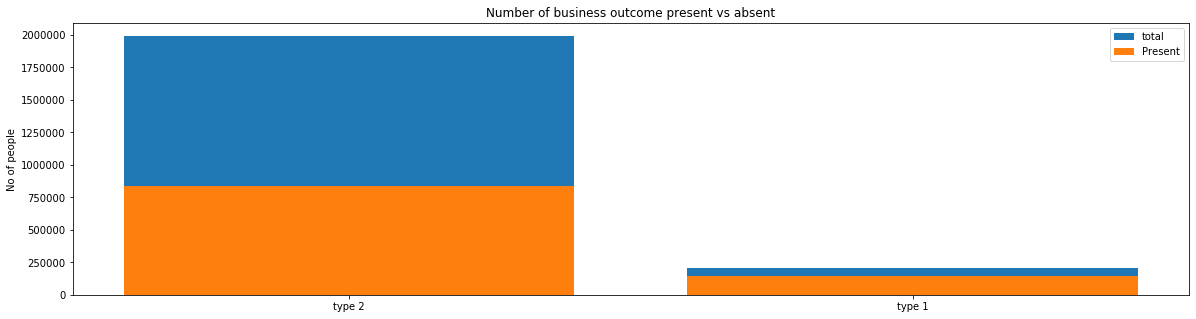

  char_1_x  outcome    total       Avg
1   type 2   833264  1991452  0.418420
0   type 1   142233   205839  0.690992
  char_1_x  outcome    total       Avg
1   type 2   833264  1991452  0.418420
0   type 1   142233   205839  0.690992


In [ ]:
univariate_barplots(tot1_dat, 'char_1_x', 'outcome', False)

* For people with char_1 as type 1 ,the percentage of business outcome is higher.
* More people are with char_1 as type 2  and the percentage of  business outcome for these group is less than 50%.
* It seems type 1  people have more chance of giving business.

<h3>group_1 of people</h3>

In [ ]:
tot1_dat["group_1"].unique()

array(['group 17304', 'group 8688', 'group 33592', ..., 'group 29913',
       'group 28835', 'group 18907'], dtype=object)

In [ ]:
findnull(tot1_dat,"group_1")

no null values are present in group_1


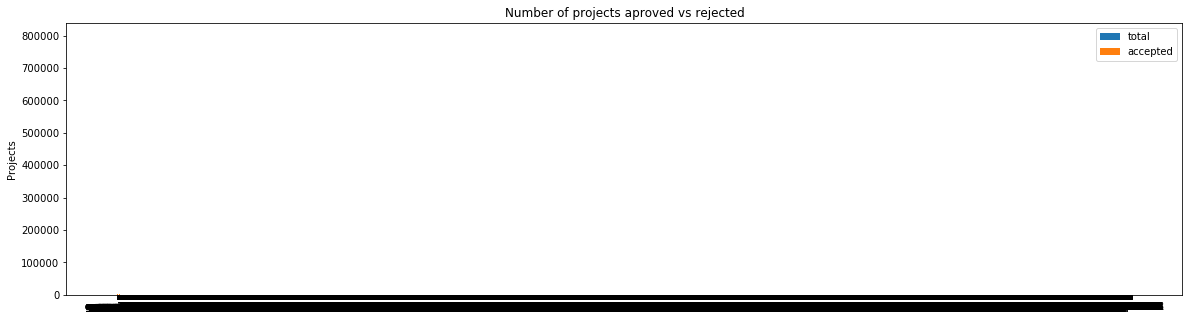

           group_1  outcome   total       Avg
4691   group 17304        0  799125  0.000000
12443  group 27940       12   53668  0.000224
27533    group 667    15865   15865  1.000000
28780   group 8386     7929    7929  1.000000
7162   group 20472     7052    7053  0.999858
           group_1  outcome  total  Avg
20498  group 40991        0      1  0.0
3435   group 15268        1      1  1.0
11370   group 2636        0      1  0.0
3429   group 15261        0      1  0.0
20002  group 40181        0      1  0.0


In [ ]:
univariate_barplots(tot1_dat, 'group_1', 'outcome', False)

* it seems as the group_1 has 29899 types,barplots are not getting displayed.
* group 17304 has most number of rows and the business outcome of these people is 0.

<h3>Char_2 of people</h3>

In [ ]:
findnull(tot1_dat,'char_2_x')

no null values are present in char_2_x


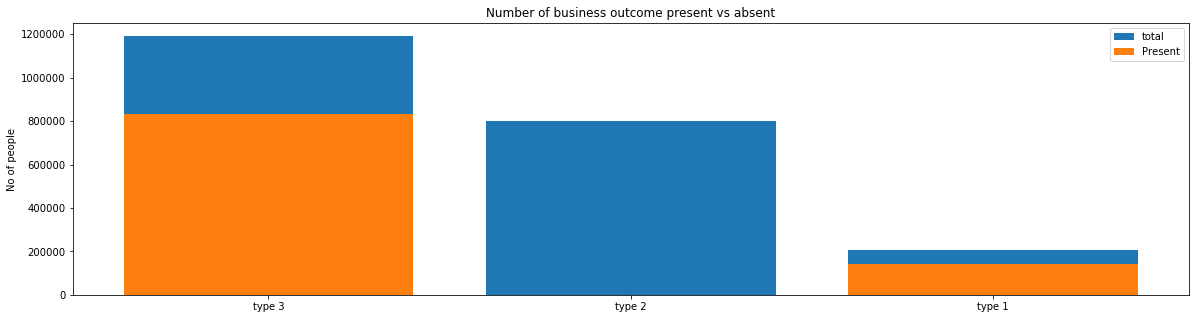

  char_2_x  outcome    total       Avg
2   type 3   833264  1192327  0.698855
1   type 2        0   799125  0.000000
0   type 1   142233   205839  0.690992
  char_2_x  outcome    total       Avg
2   type 3   833264  1192327  0.698855
1   type 2        0   799125  0.000000
0   type 1   142233   205839  0.690992


In [ ]:
univariate_barplots(tot1_dat, 'char_2_x', 'outcome', False)

* Char_2 people with type 3 and type 1 have similar percentage of business value.
* Char_2 people with type 2 have no business approval for any person.
* Char_2 people with type 3  for the majorit of the people.


<h3>date_x of people</h3>

In [ ]:
tot1_dat["date_x"].nunique()

1196

In [ ]:
findnull(tot1_dat,"date_x")

no null values are present in date_x


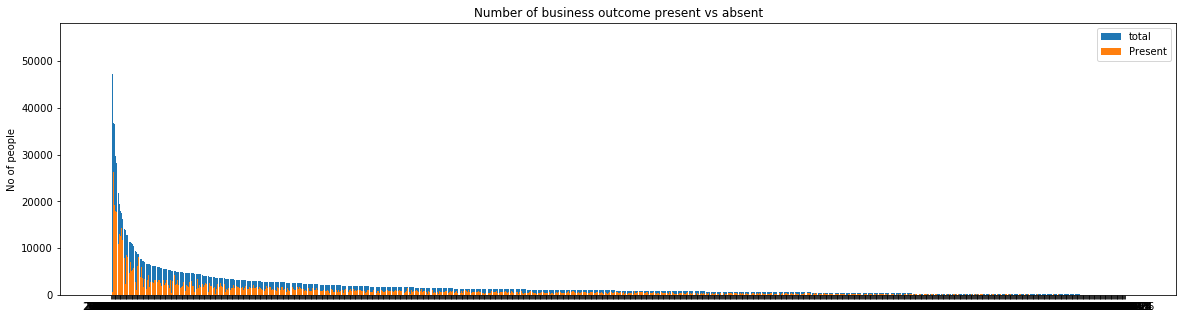

         date_x  outcome  total       Avg
651  2022-03-02      674  55371  0.012172
879  2022-10-16       53  55284  0.000959
283  2021-02-27      497  47149  0.010541
751  2022-06-10    26258  36757  0.714367
877  2022-10-14    19178  36553  0.524663
         date_x  outcome  total       Avg
348  2021-05-03        6     17  0.352941
368  2021-05-23        2     16  0.125000
98   2020-08-24        0     13  0.000000
105  2020-08-31        0      9  0.000000
382  2021-06-06        0      7  0.000000


In [ ]:
univariate_barplots(tot1_dat, 'date_x', 'outcome', False)

* currently no substantial inference can be drawn from date.
* More analysis will be performed on date feature in time analysis section.

<h3>Char_3 of people</h3>

In [ ]:
tot1_dat['char_3_x'].nunique()

43

In [ ]:
findnull(tot1_dat,'char_3_x')

no null values are present in char_3_x


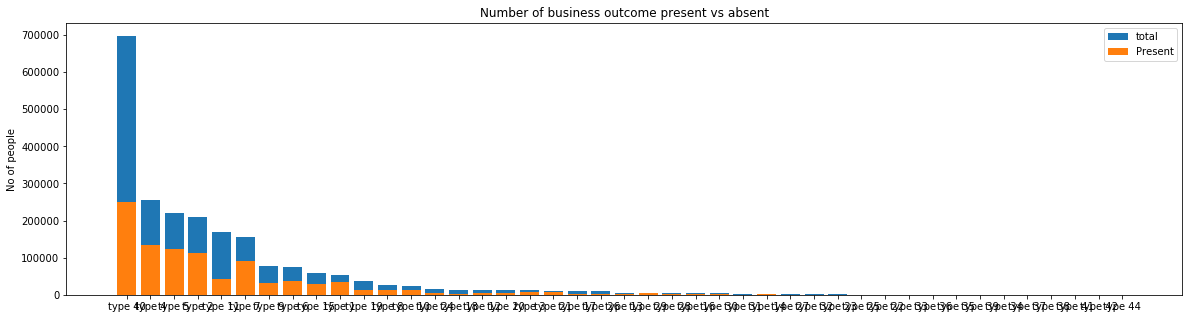

   char_3_x  outcome   total       Avg
34  type 40   250772  697260  0.359654
33   type 4   133243  254962  0.522599
38   type 5   122099  220850  0.552859
11   type 2   112970  210534  0.536588
2   type 11    42604  168300  0.253143
   char_3_x  outcome  total       Avg
30  type 37       40    152  0.263158
31  type 38       49    142  0.345070
35  type 41       16     39  0.410256
36  type 42        0      8  0.000000
37  type 44        0      7  0.000000


In [ ]:
# char_3_x
univariate_barplots(tot1_dat, 'char_3_x', 'outcome', False)

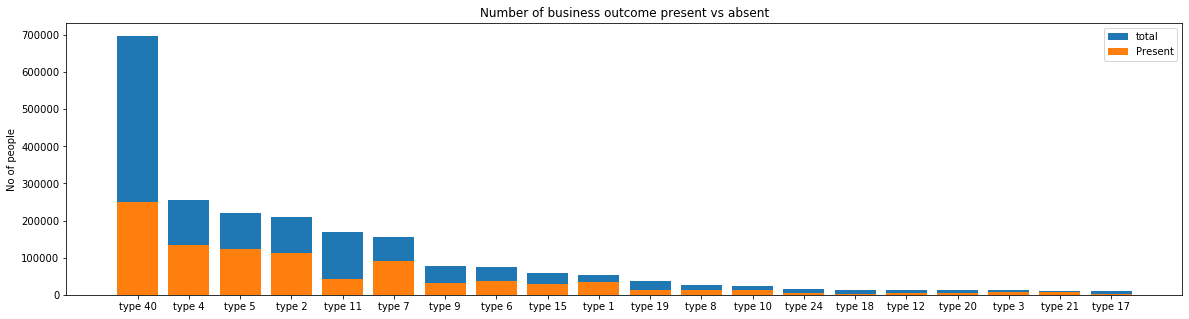

   char_3_x  outcome   total       Avg
34  type 40   250772  697260  0.359654
33   type 4   133243  254962  0.522599
38   type 5   122099  220850  0.552859
11   type 2   112970  210534  0.536588
2   type 11    42604  168300  0.253143
   char_3_x  outcome  total       Avg
3   type 12     3842  13628  0.281920
12  type 20     5155  13539  0.380752
22   type 3     6259  12923  0.484330
13  type 21     7408  10677  0.693828
8   type 17     1902  10590  0.179603


In [ ]:
univariate_barplots(tot1_dat, 'char_3_x', 'outcome', 20)

* char_3 people with type 40 forms the majority of the group but their business approval percentage is less.

<h3>Char_4 of people</h3>

In [ ]:
tot1_dat["char_4_x"].nunique()

25

In [ ]:
findnull(tot1_dat,"char_4_x")

no null values are present in char_4_x


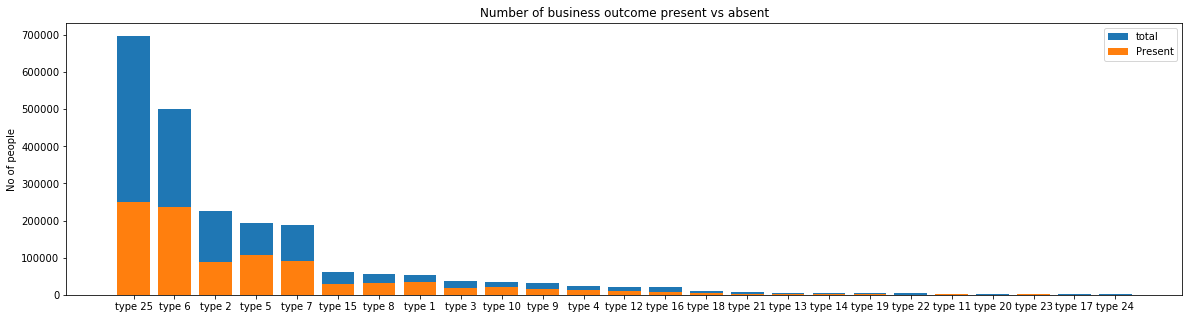

   char_4_x  outcome   total       Avg
17  type 25   250772  697260  0.359654
21   type 6   235940  501339  0.470620
11   type 2    87630  226913  0.386183
20   type 5   107721  194557  0.553673
22   type 7    92008  187500  0.490709
   char_4_x  outcome  total       Avg
2   type 11     1526   3294  0.463267
12  type 20      750   2348  0.319421
15  type 23      874   2024  0.431818
8   type 17      658   1611  0.408442
16  type 24      145   1522  0.095269


In [ ]:
univariate_barplots(tot1_dat, 'char_4_x', 'outcome', False)

* char_4 people with type 25 form the majority of the data but their business approval percentage is less.

<h3>Char_5 of people</h3>

In [ ]:
tot1_dat["char_5_x"].nunique()

9

In [ ]:
findnull(tot1_dat,"char_5_x")

no null values are present in char_5_x


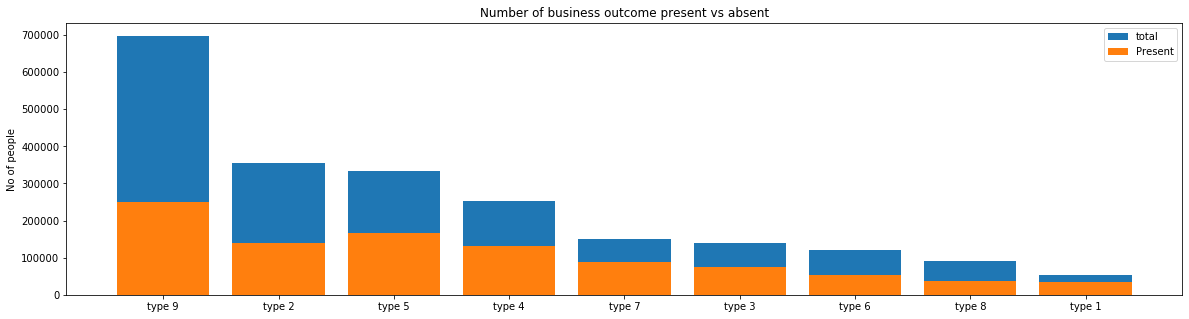

  char_5_x  outcome   total       Avg
8   type 9   250772  697260  0.359654
1   type 2   139190  355757  0.391250
4   type 5   165135  334726  0.493344
3   type 4   131147  251971  0.520485
6   type 7    87405  150847  0.579428
  char_5_x  outcome   total       Avg
6   type 7    87405  150847  0.579428
2   type 3    75358  139576  0.539907
5   type 6    54294  121422  0.447151
7   type 8    36758   91533  0.401582
0   type 1    35438   54199  0.653850


In [ ]:
univariate_barplots(tot1_dat, 'char_5_x', 'outcome', False)

* char_5 people with type 9 form the majority but their business approval is less.
* type 1 people have the lowest numbers but their business approval is higher than all other types.

<h3>Char_6 of people</h3>

In [ ]:
tot1_dat["char_6_x"].nunique()

7

In [ ]:
findnull(tot1_dat,"char_6_x")

no null values are present in char_6_x


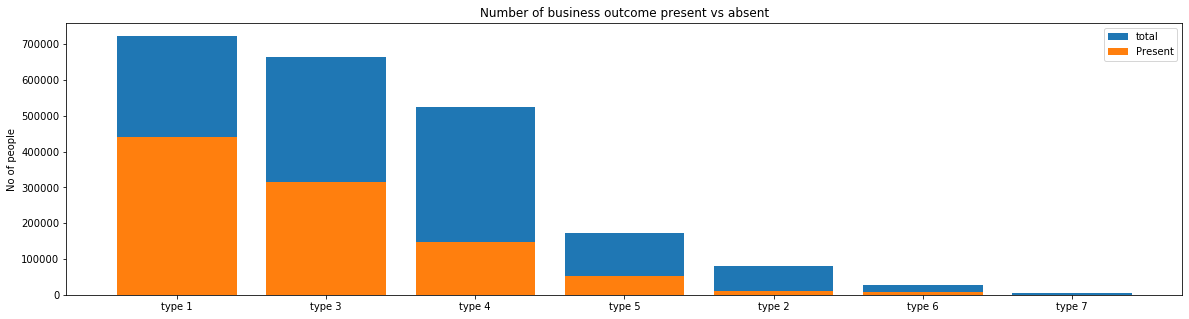

  char_6_x  outcome   total       Avg
0   type 1   439582  723095  0.607917
2   type 3   316077  665495  0.474950
3   type 4   147791  524499  0.281776
4   type 5    52721  171854  0.306778
1   type 2    10485   81543  0.128582
  char_6_x  outcome   total       Avg
3   type 4   147791  524499  0.281776
4   type 5    52721  171854  0.306778
1   type 2    10485   81543  0.128582
5   type 6     8841   26105  0.338671
6   type 7        0    4700  0.000000


In [ ]:
univariate_barplots(tot1_dat, 'char_6_x', 'outcome', False)

* Char_6 people with type 1 form the majority in the group and their business approval is also highest in the group.
* type 7 people are the lowest in numbers and none of them have business approval.

<h3>Char_7 of people</h3>

In [ ]:
tot1_dat["char_7_x"].nunique()

25

In [ ]:
findnull(tot1_dat,"char_7_x")

no null values are present in char_7_x


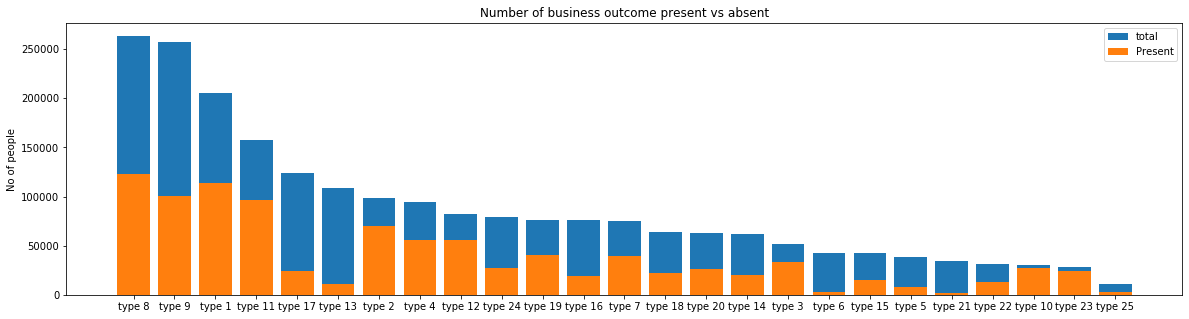

   char_7_x  outcome   total       Avg
23   type 8   123198  263444  0.467644
24   type 9   100292  256852  0.390466
0    type 1   113888  205522  0.554140
2   type 11    96907  157290  0.616104
8   type 17    24538  123713  0.198346
   char_7_x  outcome  total       Avg
13  type 21     2196  34765  0.063167
14  type 22    12610  31283  0.403094
1   type 10    27437  30509  0.899308
15  type 23    24474  27938  0.876011
17  type 25     3328  10937  0.304288


In [ ]:
univariate_barplots(tot1_dat, 'char_7_x', 'outcome', False)

* type10 and type 23 are less in numbers but theeir business approval is higher in the entire group.
* type8 & type 9 form the majority of the group but their business approval percentage is less than 50%.

<h3>Char_8 of people</h3>

In [ ]:
tot1_dat["char_8_x"].nunique()

8

In [ ]:
findnull(tot1_dat,"char_8_x")

no null values are present in char_8_x


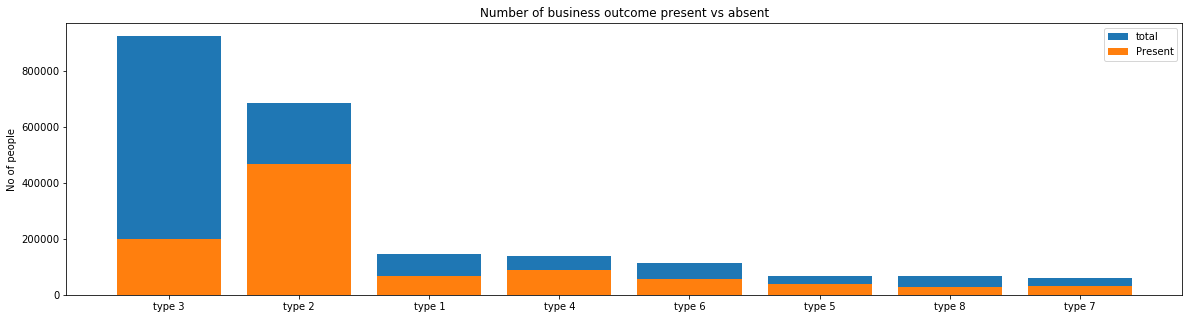

  char_8_x  outcome   total       Avg
2   type 3   198788  925643  0.214757
1   type 2   467409  684186  0.683161
0   type 1    68187  144502  0.471876
3   type 4    87515  137081  0.638418
5   type 6    55027  112268  0.490140
  char_8_x  outcome   total       Avg
3   type 4    87515  137081  0.638418
5   type 6    55027  112268  0.490140
4   type 5    38521   67761  0.568483
7   type 8    27663   66113  0.418420
6   type 7    32387   59737  0.542160


In [ ]:
univariate_barplots(tot1_dat, 'char_8_x', 'outcome', False)

* type 3 form the majority of the group but their business approval rate is the lowest in the group.
* type 2 & type 4 people have the highest business approval percentage is the group.

<h3>Char_9 of people</h3>

In [ ]:
tot1_dat["char_9_x"].nunique()

9

In [ ]:
findnull(tot1_dat,"char_9_x")

no null values are present in char_9_x


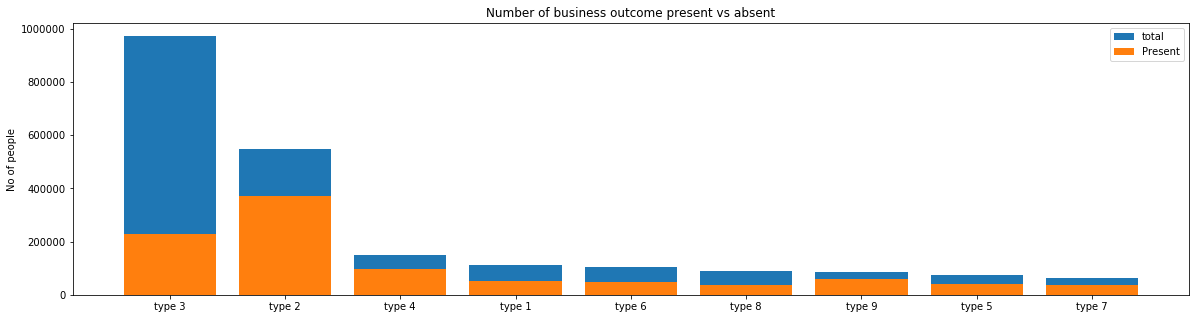

  char_9_x  outcome   total       Avg
2   type 3   229864  972575  0.236346
1   type 2   370753  548207  0.676301
3   type 4    98570  149356  0.659967
0   type 1    51279  112371  0.456337
5   type 6    49425  104130  0.474647
  char_9_x  outcome   total       Avg
5   type 6    49425  104130  0.474647
7   type 8    38519   87806  0.438683
8   type 9    59719   86977  0.686607
4   type 5    41786   73472  0.568734
6   type 7    35582   62397  0.570252


In [ ]:
univariate_barplots(tot1_dat, 'char_9_x', 'outcome', False)

* Type 3 forms the majority of the group but their business approval percentage is lowest in the group.
* TYpe 2 ,Type 4 and Type 9 have the highest business approval percentage.

<h3>Char_10 of people</h3>

In [ ]:
tot1_dat["char_10_x"].nunique()

2

In [ ]:
findnull(tot1_dat,"char_10_x")

no null values are present in char_10_x


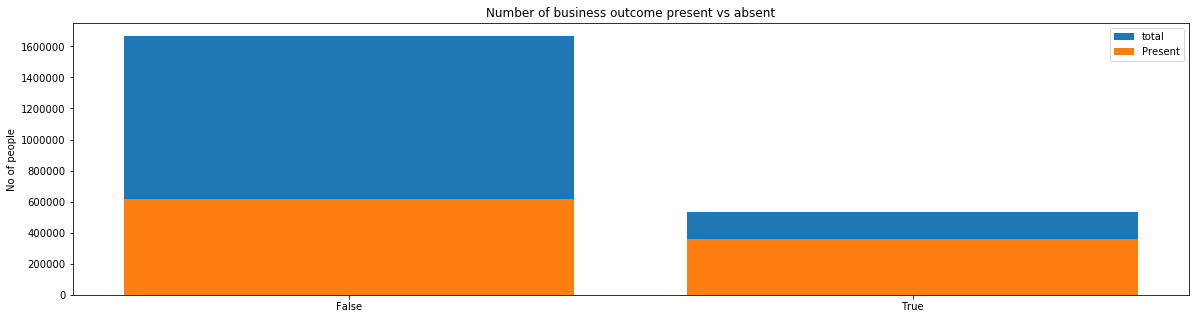

   char_10_x  outcome    total       Avg
0      False   614485  1667159  0.368582
1       True   361012   530132  0.680985
   char_10_x  outcome    total       Avg
0      False   614485  1667159  0.368582
1       True   361012   530132  0.680985


In [ ]:
univariate_barplots(tot1_dat, 'char_10_x', 'outcome', False)

* False type makes the majority of the group but the business approval is low.
* True type has the highest business approval percentage.

<h3>Char_11 of people</h3>

In [ ]:
findnull(tot1_dat,"char_11")

no null values are present in char_11


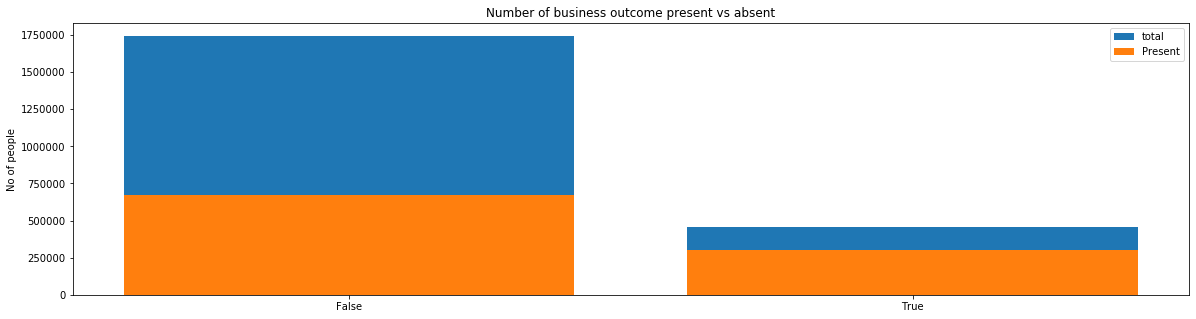

   char_11  outcome    total       Avg
0    False   674042  1743501  0.386603
1     True   301455   453790  0.664305
   char_11  outcome    total       Avg
0    False   674042  1743501  0.386603
1     True   301455   453790  0.664305


In [ ]:
univariate_barplots(tot1_dat, 'char_11', 'outcome', False)

* False type makes the majority of the group but the business approval is low.
* True type has the highest business approval percentage.

<h3>Char_12 to Char_37 of people</h3>

In [ ]:
findnull(tot1_dat,"char_12")

no null values are present in char_12


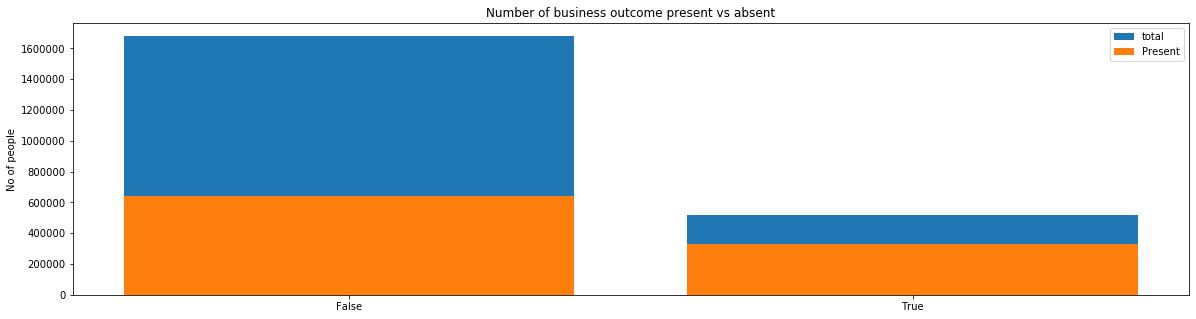

   char_12  outcome    total       Avg
0    False   642357  1681367  0.382044
1     True   333140   515924  0.645715
   char_12  outcome    total       Avg
0    False   642357  1681367  0.382044
1     True   333140   515924  0.645715


In [ ]:
univariate_barplots(tot1_dat, 'char_12', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_13")

no null values are present in char_13


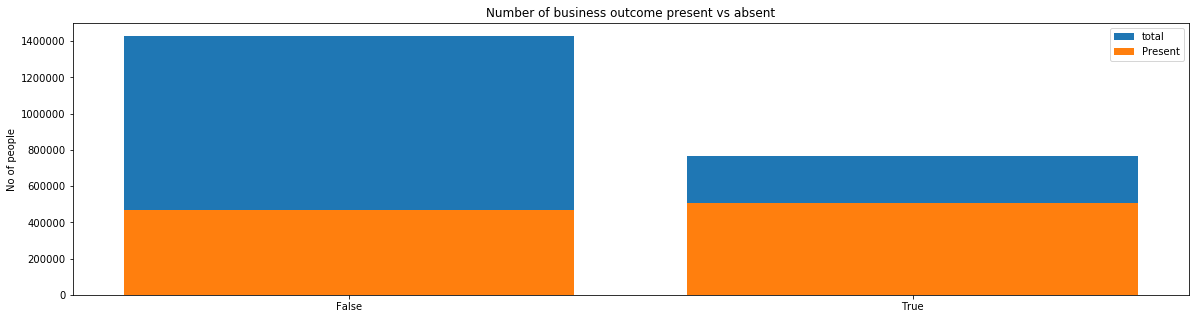

   char_13  outcome    total       Avg
0    False   466953  1429402  0.326677
1     True   508544   767889  0.662262
   char_13  outcome    total       Avg
0    False   466953  1429402  0.326677
1     True   508544   767889  0.662262


In [ ]:
univariate_barplots(tot1_dat, 'char_13', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_14")

no null values are present in char_14


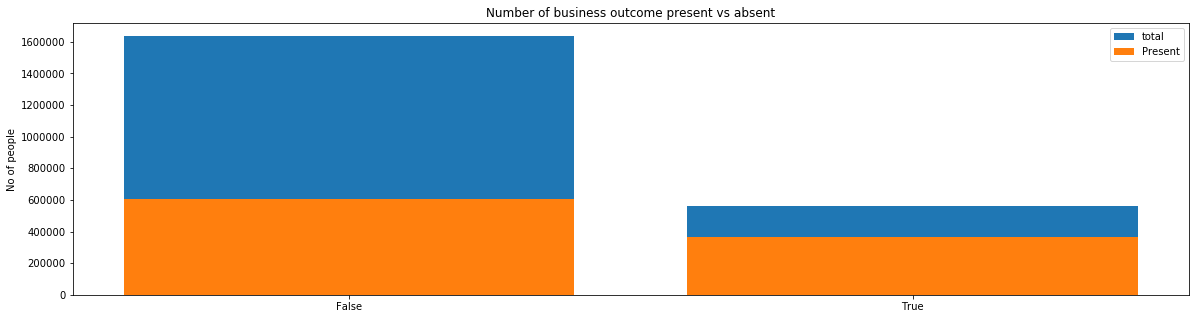

   char_14  outcome    total       Avg
0    False   608777  1636690  0.371956
1     True   366720   560601  0.654155
   char_14  outcome    total       Avg
0    False   608777  1636690  0.371956
1     True   366720   560601  0.654155


In [ ]:
univariate_barplots(tot1_dat, 'char_14', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_15")

no null values are present in char_15


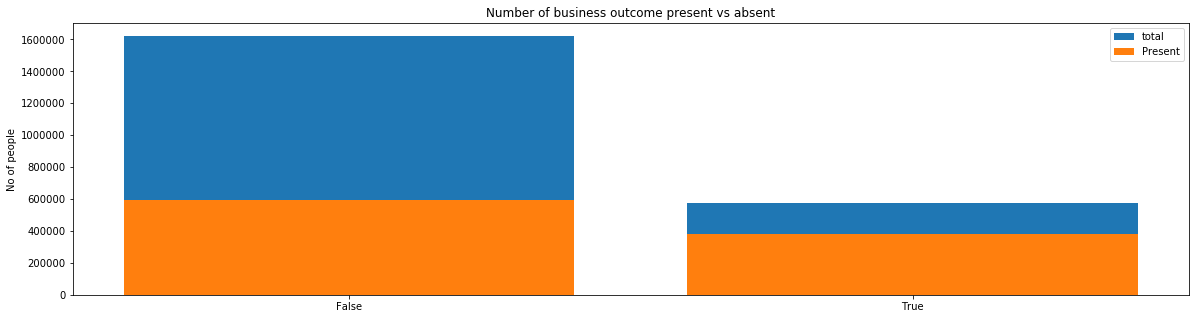

   char_15  outcome    total       Avg
0    False   593206  1621615  0.365812
1     True   382291   575676  0.664073
   char_15  outcome    total       Avg
0    False   593206  1621615  0.365812
1     True   382291   575676  0.664073


In [ ]:
univariate_barplots(tot1_dat, 'char_15', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_16")

no null values are present in char_16


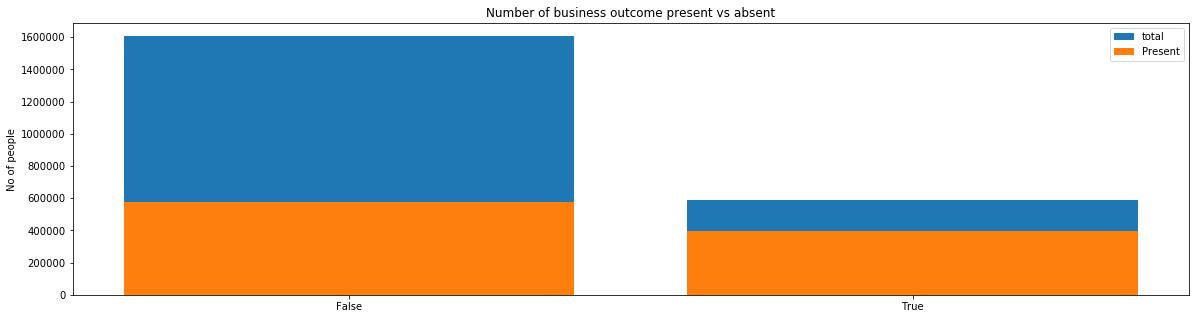

   char_16  outcome    total       Avg
0    False   579034  1607842  0.360131
1     True   396463   589449  0.672599
   char_16  outcome    total       Avg
0    False   579034  1607842  0.360131
1     True   396463   589449  0.672599


In [ ]:
univariate_barplots(tot1_dat, 'char_16', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_17")

no null values are present in char_17


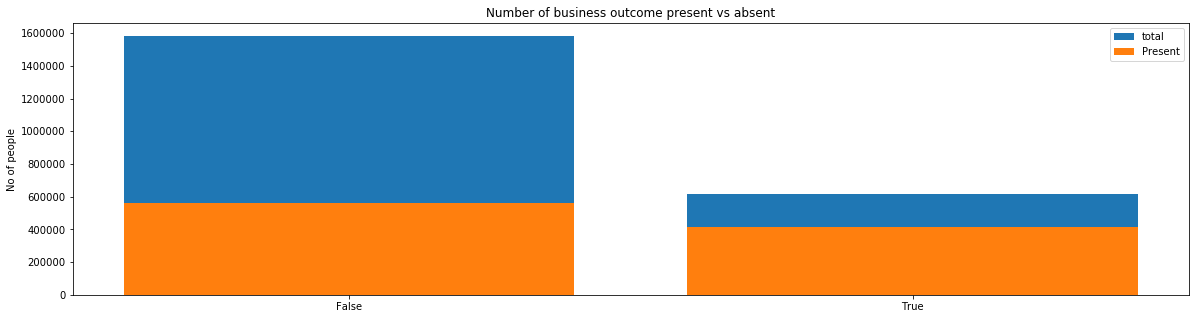

   char_17  outcome    total       Avg
0    False   562048  1582675  0.355125
1     True   413449   614616  0.672695
   char_17  outcome    total       Avg
0    False   562048  1582675  0.355125
1     True   413449   614616  0.672695


In [ ]:
univariate_barplots(tot1_dat, 'char_17', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_18")

no null values are present in char_18


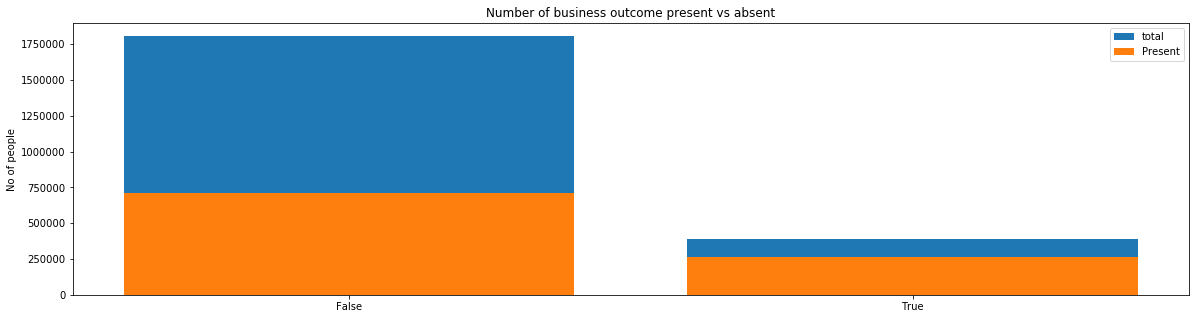

   char_18  outcome    total       Avg
0    False   714209  1807392  0.395160
1     True   261288   389899  0.670143
   char_18  outcome    total       Avg
0    False   714209  1807392  0.395160
1     True   261288   389899  0.670143


In [ ]:
univariate_barplots(tot1_dat, 'char_18', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_19")

no null values are present in char_19


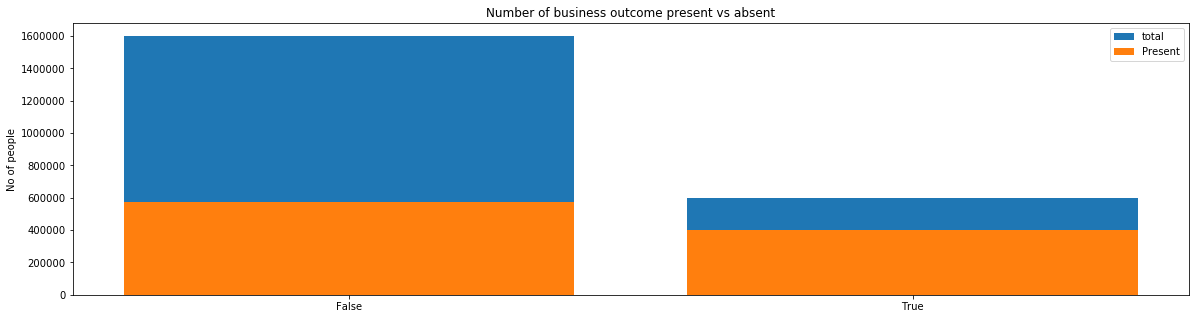

   char_19  outcome    total       Avg
0    False   575309  1601399  0.359254
1     True   400188   595892  0.671578
   char_19  outcome    total       Avg
0    False   575309  1601399  0.359254
1     True   400188   595892  0.671578


In [ ]:
univariate_barplots(tot1_dat, 'char_19', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_20")

no null values are present in char_20


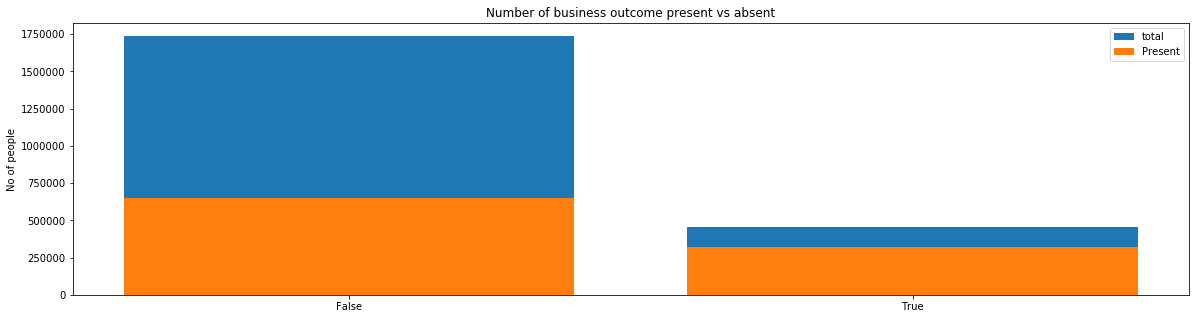

   char_20  outcome    total       Avg
0    False   651800  1738574  0.374905
1     True   323697   458717  0.705657
   char_20  outcome    total       Avg
0    False   651800  1738574  0.374905
1     True   323697   458717  0.705657


In [ ]:
univariate_barplots(tot1_dat, 'char_20', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_21")

no null values are present in char_21


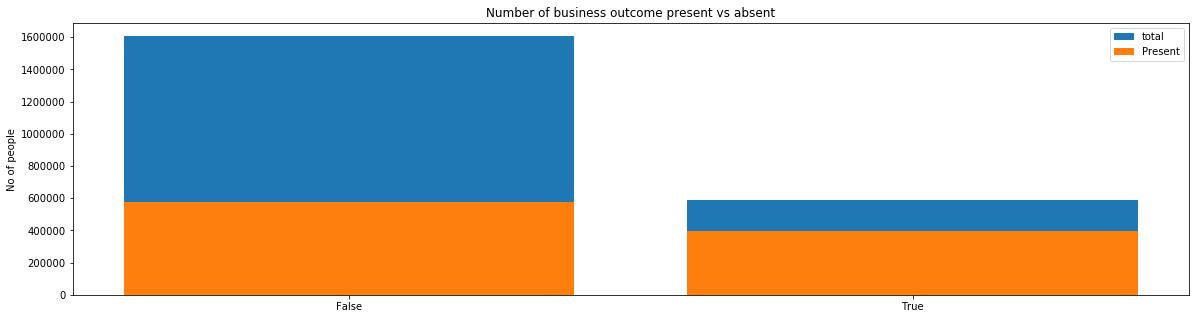

   char_21  outcome    total       Avg
0    False   578599  1607104  0.360026
1     True   396898   590187  0.672495
   char_21  outcome    total       Avg
0    False   578599  1607104  0.360026
1     True   396898   590187  0.672495


In [ ]:
univariate_barplots(tot1_dat, 'char_21', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_22")

no null values are present in char_22


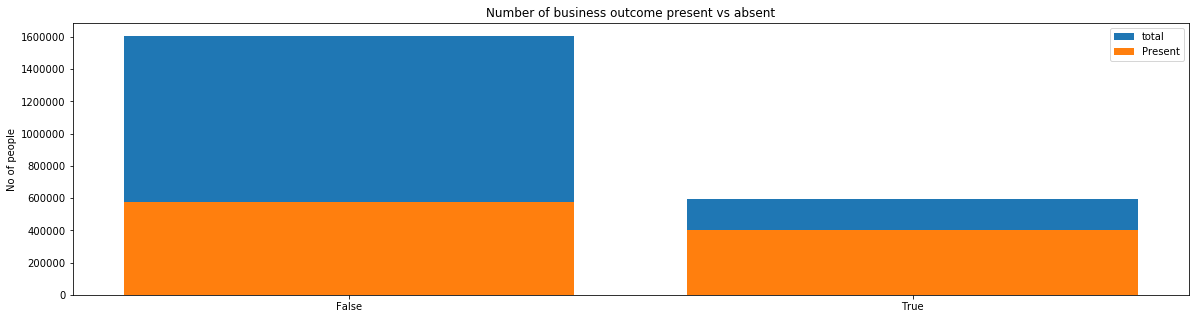

   char_22  outcome    total       Avg
0    False   574391  1605733  0.357713
1     True   401106   591558  0.678050
   char_22  outcome    total       Avg
0    False   574391  1605733  0.357713
1     True   401106   591558  0.678050


In [ ]:
univariate_barplots(tot1_dat, 'char_22', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_23")

no null values are present in char_23


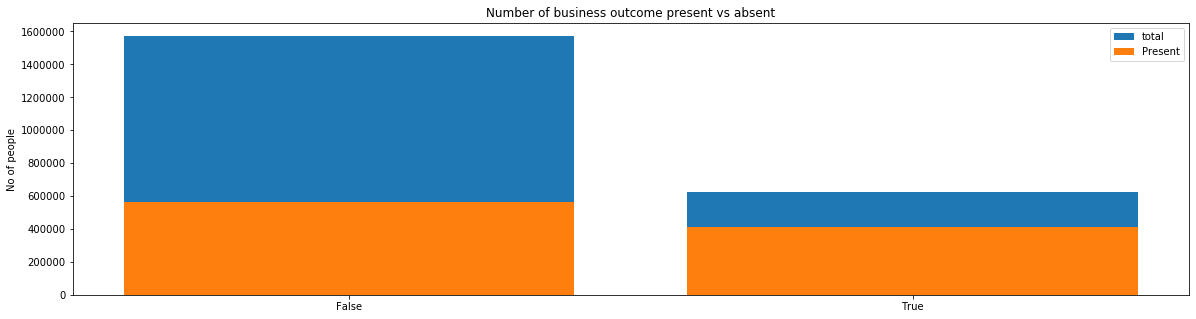

   char_23  outcome    total       Avg
0    False   564723  1572898  0.359033
1     True   410774   624393  0.657877
   char_23  outcome    total       Avg
0    False   564723  1572898  0.359033
1     True   410774   624393  0.657877


In [ ]:
univariate_barplots(tot1_dat, 'char_23', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_24")

no null values are present in char_24


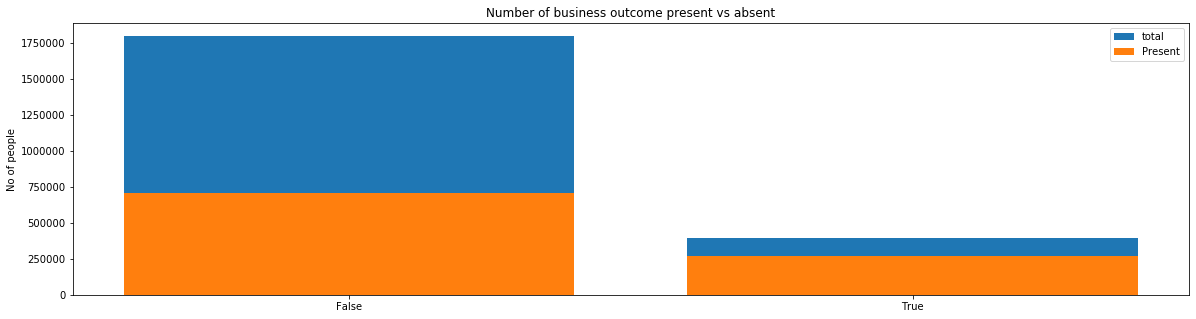

   char_24  outcome    total       Avg
0    False   706167  1800099  0.392293
1     True   269330   397192  0.678085
   char_24  outcome    total       Avg
0    False   706167  1800099  0.392293
1     True   269330   397192  0.678085


In [ ]:
univariate_barplots(tot1_dat, 'char_24', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_25")

no null values are present in char_25


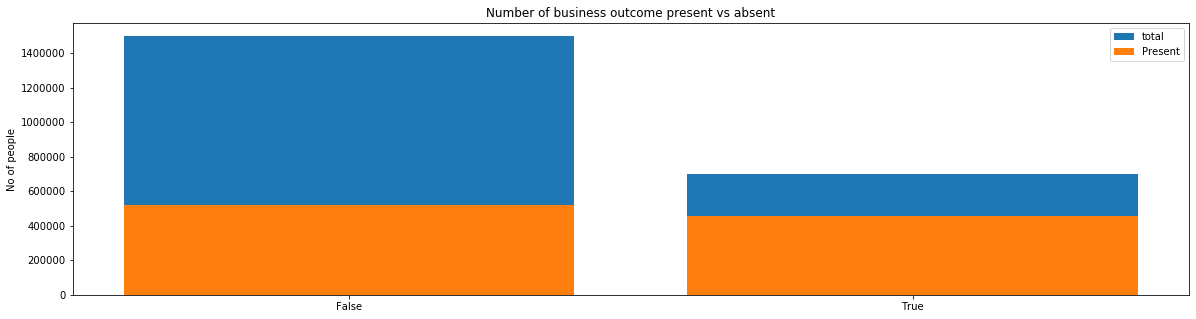

   char_25  outcome    total       Avg
0    False   518558  1498783  0.345986
1     True   456939   698508  0.654164
   char_25  outcome    total       Avg
0    False   518558  1498783  0.345986
1     True   456939   698508  0.654164


In [ ]:
univariate_barplots(tot1_dat, 'char_25', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_26")

no null values are present in char_26


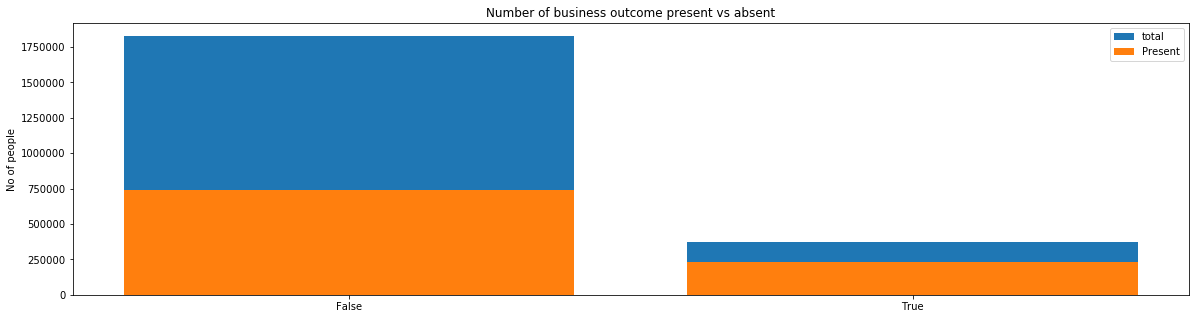

   char_26  outcome    total       Avg
0    False   740847  1827630  0.405359
1     True   234650   369661  0.634771
   char_26  outcome    total       Avg
0    False   740847  1827630  0.405359
1     True   234650   369661  0.634771


In [ ]:
univariate_barplots(tot1_dat, 'char_26', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_27")

no null values are present in char_27


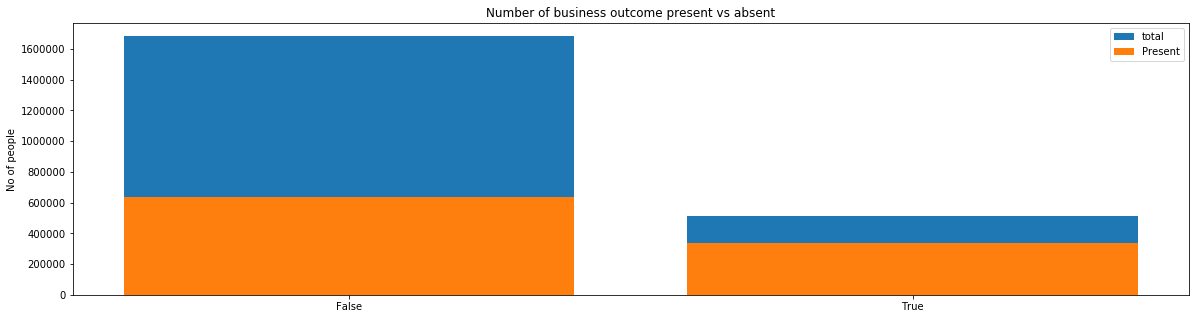

   char_27  outcome    total       Avg
0    False   639369  1684399  0.379583
1     True   336128   512892  0.655358
   char_27  outcome    total       Avg
0    False   639369  1684399  0.379583
1     True   336128   512892  0.655358


In [ ]:
univariate_barplots(tot1_dat, 'char_27', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_28")

no null values are present in char_28


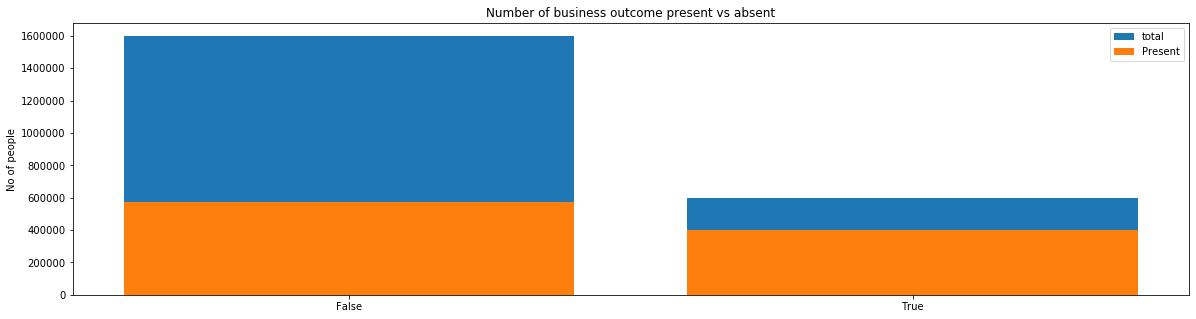

   char_28  outcome    total       Avg
0    False   575408  1599986  0.359633
1     True   400089   597305  0.669824
   char_28  outcome    total       Avg
0    False   575408  1599986  0.359633
1     True   400089   597305  0.669824


In [ ]:
univariate_barplots(tot1_dat, 'char_28', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_29")

no null values are present in char_29


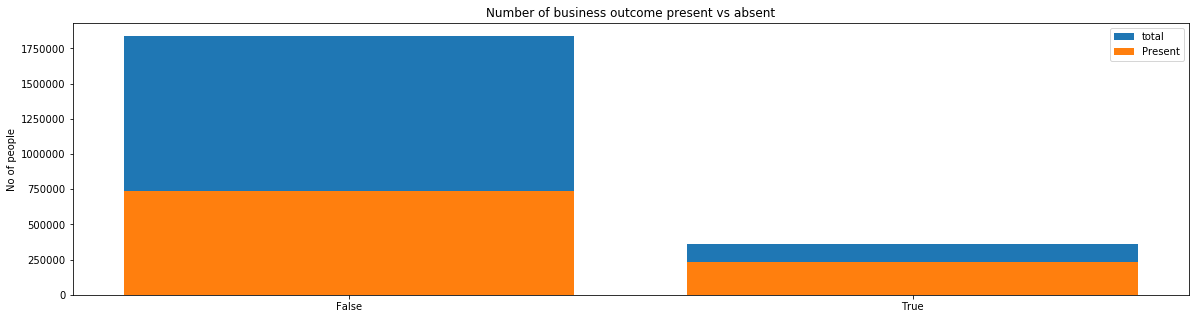

   char_29  outcome    total       Avg
0    False   740554  1838811  0.402735
1     True   234943   358480  0.655387
   char_29  outcome    total       Avg
0    False   740554  1838811  0.402735
1     True   234943   358480  0.655387


In [ ]:
univariate_barplots(tot1_dat, 'char_29', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_30")

no null values are present in char_30


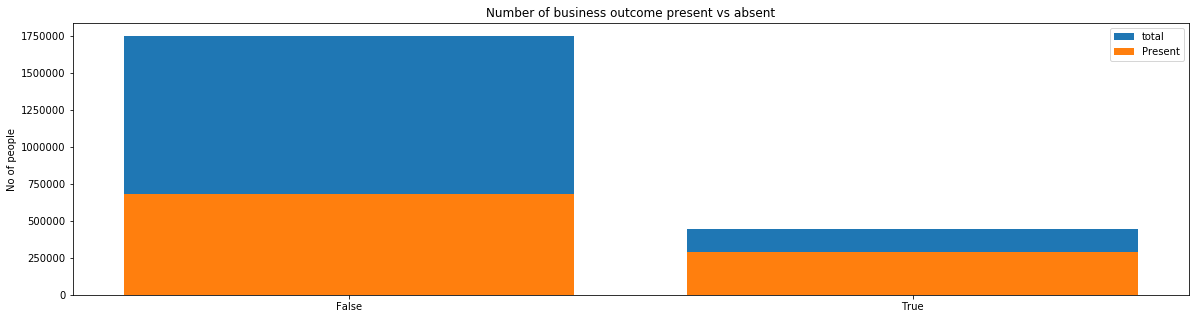

   char_30  outcome    total       Avg
0    False   684049  1749461  0.391006
1     True   291448   447830  0.650801
   char_30  outcome    total       Avg
0    False   684049  1749461  0.391006
1     True   291448   447830  0.650801


In [ ]:
univariate_barplots(tot1_dat, 'char_30', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_31")

no null values are present in char_31


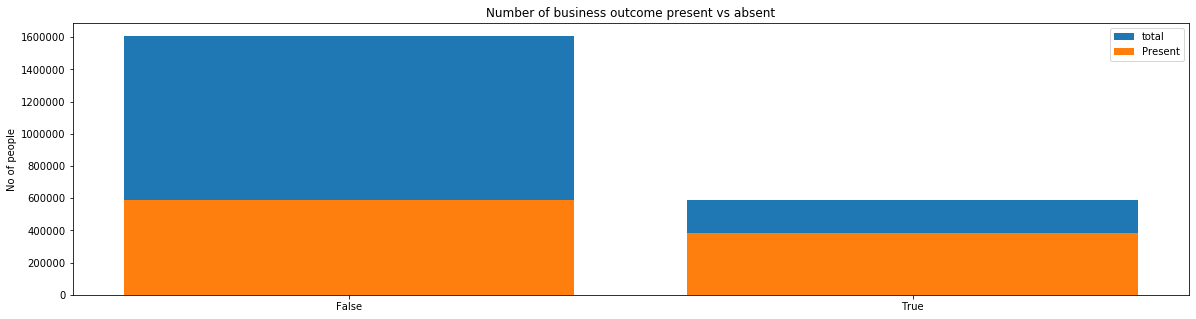

   char_31  outcome    total       Avg
0    False   590810  1607379  0.367561
1     True   384687   589912  0.652109
   char_31  outcome    total       Avg
0    False   590810  1607379  0.367561
1     True   384687   589912  0.652109


In [ ]:
univariate_barplots(tot1_dat, 'char_31', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_32")

no null values are present in char_32


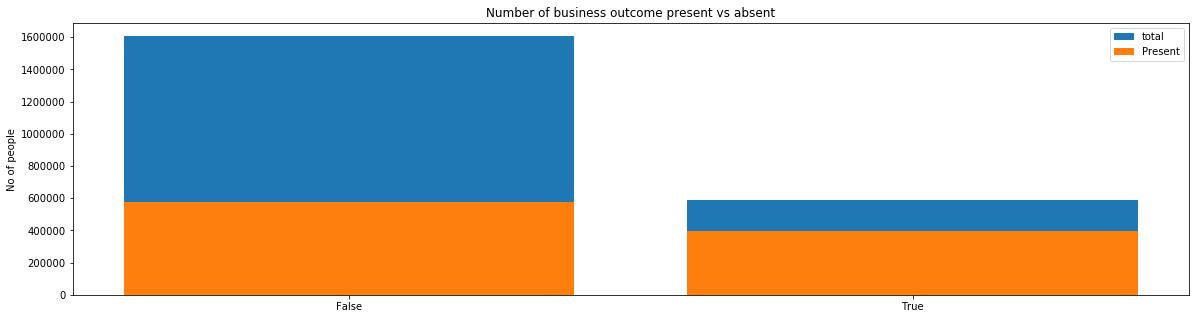

   char_32  outcome    total       Avg
0    False   579202  1608414  0.360108
1     True   396295   588877  0.672967
   char_32  outcome    total       Avg
0    False   579202  1608414  0.360108
1     True   396295   588877  0.672967


In [ ]:
univariate_barplots(tot1_dat, 'char_32', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_33")

no null values are present in char_33


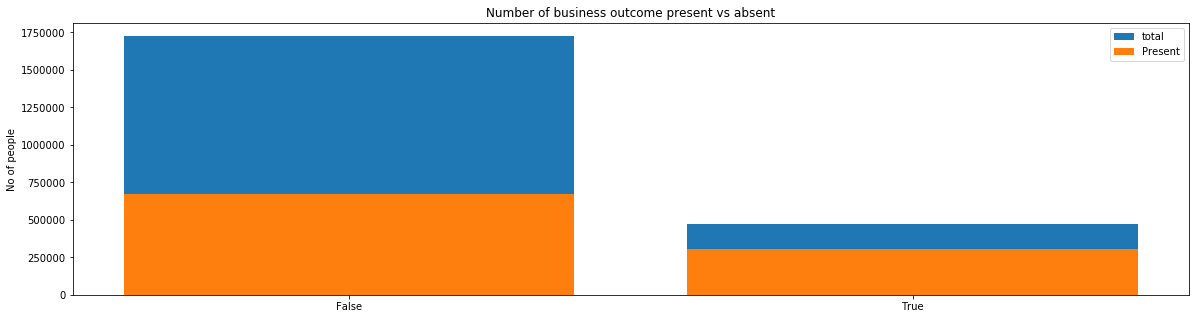

   char_33  outcome    total       Avg
0    False   671166  1726900  0.388654
1     True   304331   470391  0.646975
   char_33  outcome    total       Avg
0    False   671166  1726900  0.388654
1     True   304331   470391  0.646975


In [ ]:
univariate_barplots(tot1_dat, 'char_33', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_34")

no null values are present in char_34


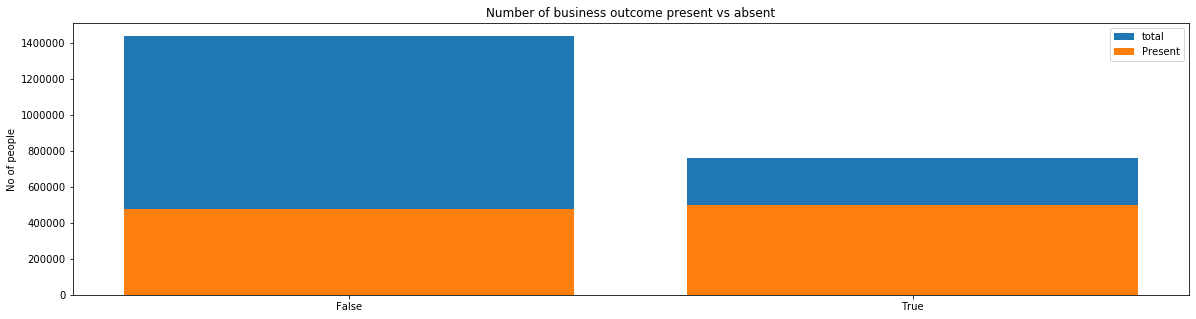

   char_34  outcome    total       Avg
0    False   475376  1437466  0.330704
1     True   500121   759825  0.658206
   char_34  outcome    total       Avg
0    False   475376  1437466  0.330704
1     True   500121   759825  0.658206


In [ ]:
univariate_barplots(tot1_dat, 'char_34', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_35")

no null values are present in char_35


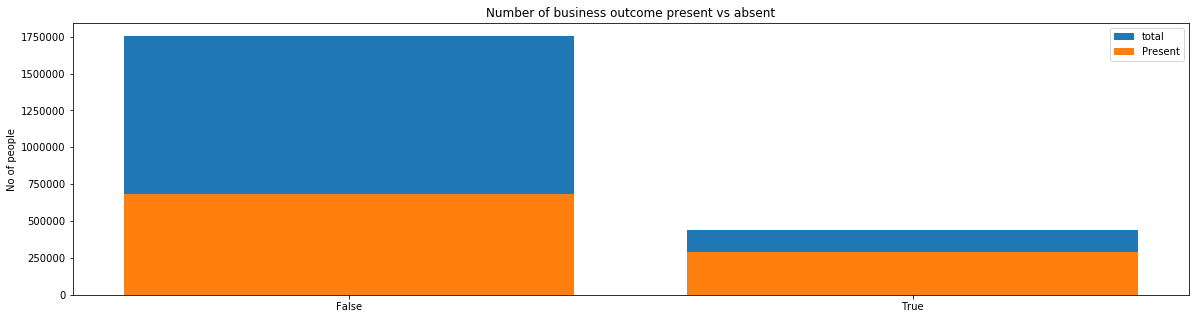

   char_35  outcome    total       Avg
0    False   684949  1754908  0.390305
1     True   290548   442383  0.656779
   char_35  outcome    total       Avg
0    False   684949  1754908  0.390305
1     True   290548   442383  0.656779


In [ ]:
univariate_barplots(tot1_dat, 'char_35', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_36")

no null values are present in char_36


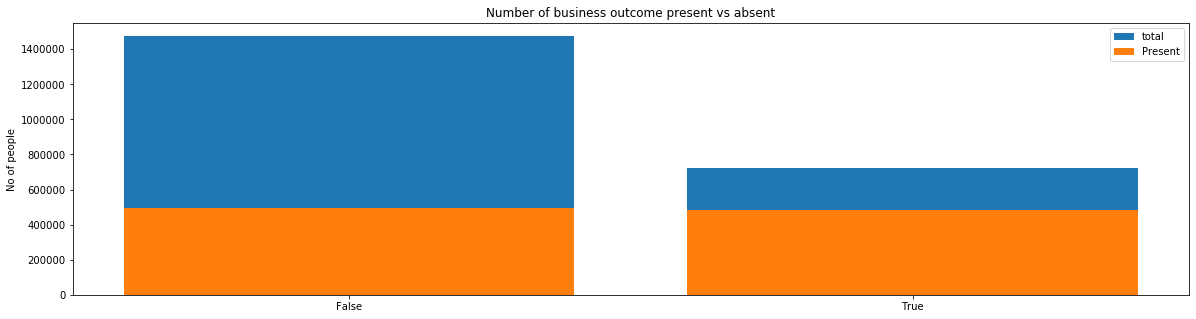

   char_36  outcome    total       Avg
0    False   493103  1475996  0.334082
1     True   482394   721295  0.668789
   char_36  outcome    total       Avg
0    False   493103  1475996  0.334082
1     True   482394   721295  0.668789


In [ ]:
univariate_barplots(tot1_dat, 'char_36', 'outcome', False)

In [ ]:
findnull(tot1_dat,"char_37")

no null values are present in char_37


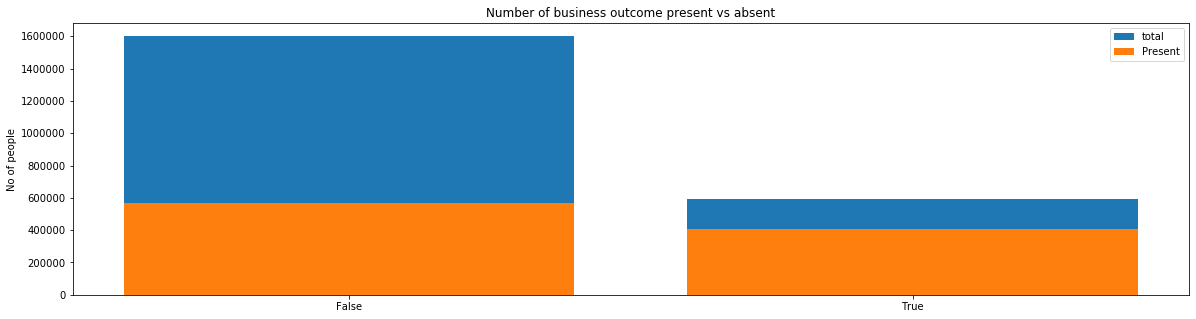

   char_37  outcome    total       Avg
0    False   570944  1602193  0.356352
1     True   404553   595098  0.679809
   char_37  outcome    total       Avg
0    False   570944  1602193  0.356352
1     True   404553   595098  0.679809


In [ ]:
univariate_barplots(tot1_dat, 'char_37', 'outcome', False)

### from Char_ 10 to Char_37 ,all types show similar trends
* For all the types false value makes the majority.
* True types have the highest business approval rate.

<h3>Char_38 of people</h3>

In [ ]:
tot1_dat["char_38"].nunique()

101

In [ ]:
findnull(tot1_dat,"char_38")

no null values are present in char_38


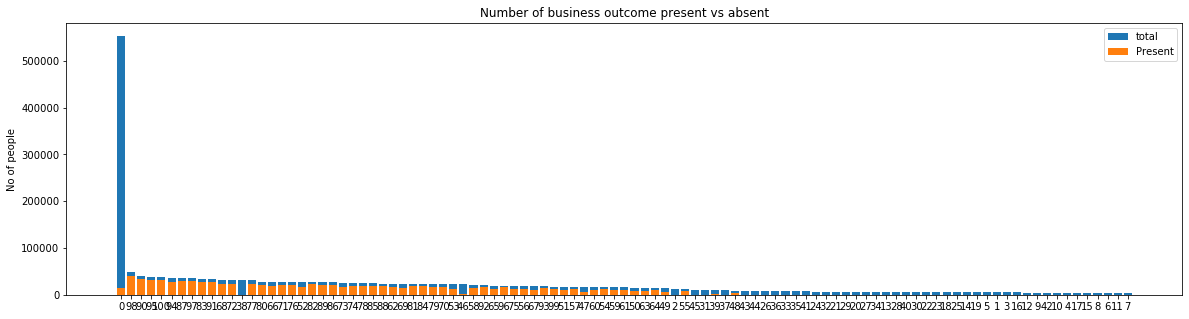

     char_38  outcome   total       Avg
0          0    14969  553330  0.027053
98        98    41076   47902  0.857501
90        90    32749   41098  0.796851
95        95    31125   37960  0.819942
100      100    31891   37604  0.848075
    char_38  outcome  total       Avg
15       15       11   3918  0.002808
8         8        0   3854  0.000000
6         6       63   3818  0.016501
11       11        0   3758  0.000000
7         7        0   3690  0.000000


In [ ]:
univariate_barplots(tot1_dat, 'char_38', 'outcome', False)

* Char_38 with 0 value has the highest number of data but the business approval percentage is very low.
* From the plot we can see that multiple groups towards the end have no business approval.

<h3>CDF of Char_38</h3>

[0.27406156 0.02260056 0.03000513 0.04686862 0.04858847 0.08357109
 0.09403443 0.11787242 0.12564972 0.15674801]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


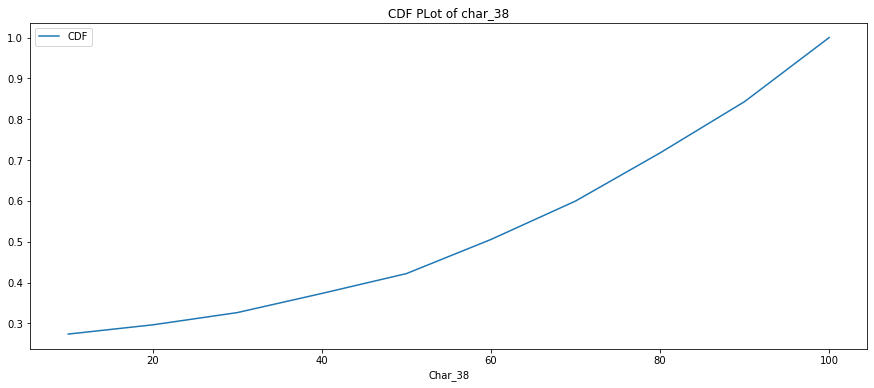

In [ ]:
counts, bin_edges = np.histogram(tot1_dat["char_38"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)

plt.figure(figsize=(15,6))

plt.plot(bin_edges[1:], cdf,label='CDF')
plt.title("CDF PLot of char_38")
plt.legend()
plt.xlabel('Char_38')


plt.show();

* 90 % of data for char 38 has value less than 90.

<h3>Activity_Category</h3>

In [ ]:
findnull(tot1_dat,"activity_category")

no null values are present in activity_category


In [ ]:
tot1_dat.activity_category.nunique()

7

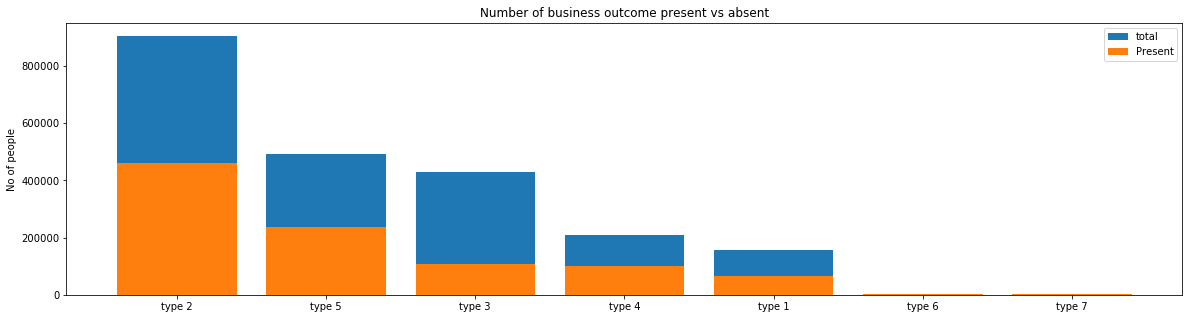

  activity_category  outcome   total       Avg
1            type 2   461681  904683  0.510324
4            type 5   235660  490710  0.480243
2            type 3   108206  429408  0.251989
3            type 4   101493  207465  0.489205
0            type 1    64831  157615  0.411325
  activity_category  outcome   total       Avg
2            type 3   108206  429408  0.251989
3            type 4   101493  207465  0.489205
0            type 1    64831  157615  0.411325
5            type 6     2364    4253  0.555843
6            type 7     1262    3157  0.399747


In [ ]:
univariate_barplots(tot1_dat, 'activity_category', 'outcome', False)

* Activity category with type 2 value has highest percentage of busines approval.

<h3>Null Value replacement for char_1 t char_9 of activity</h3>

In [ ]:
findnull(tot1_dat,"char_1_y")

char_1_y 2039676


In [ ]:
findnull(tot1_dat,"char_9_y")

char_9_y 2039676


* As Char_1 to char_9 values only come for type_1 activity category,the number of null values for these columns is huge.
* As a first hand approach,all these null fields will be replaced with a value as 'type -1'.

In [12]:
tot1_dat.loc[tot1_dat["char_1_y"].isnull(),"char_1_y"]="type -1"

In [13]:
tot1_dat.loc[tot1_dat["char_2_y"].isnull(),"char_2_y"]="type -1"
tot1_dat.loc[tot1_dat["char_3_y"].isnull(),"char_3_y"]="type -1"
tot1_dat.loc[tot1_dat["char_4_y"].isnull(),"char_4_y"]="type -1"
tot1_dat.loc[tot1_dat["char_5_y"].isnull(),"char_5_y"]="type -1"
tot1_dat.loc[tot1_dat["char_6_y"].isnull(),"char_6_y"]="type -1"
tot1_dat.loc[tot1_dat["char_7_y"].isnull(),"char_7_y"]="type -1"
tot1_dat.loc[tot1_dat["char_8_y"].isnull(),"char_8_y"]="type -1"
tot1_dat.loc[tot1_dat["char_9_y"].isnull(),"char_9_y"]="type -1"


In [14]:
tot2_dat.loc[tot2_dat["char_1_y"].isnull(),"char_1_y"]="type -1"
tot2_dat.loc[tot2_dat["char_2_y"].isnull(),"char_2_y"]="type -1"
tot2_dat.loc[tot2_dat["char_3_y"].isnull(),"char_3_y"]="type -1"
tot2_dat.loc[tot2_dat["char_4_y"].isnull(),"char_4_y"]="type -1"
tot2_dat.loc[tot2_dat["char_5_y"].isnull(),"char_5_y"]="type -1"
tot2_dat.loc[tot2_dat["char_6_y"].isnull(),"char_6_y"]="type -1"
tot2_dat.loc[tot2_dat["char_7_y"].isnull(),"char_7_y"]="type -1"
tot2_dat.loc[tot2_dat["char_8_y"].isnull(),"char_8_y"]="type -1"
tot2_dat.loc[tot2_dat["char_9_y"].isnull(),"char_9_y"]="type -1"

In [ ]:
findnull(tot1_dat,"char_1_y")

no null values are present in char_1_y


In [ ]:
findnull(tot1_dat,"char_9_y")

no null values are present in char_9_y


<h3>Char_1 of activity</h3>

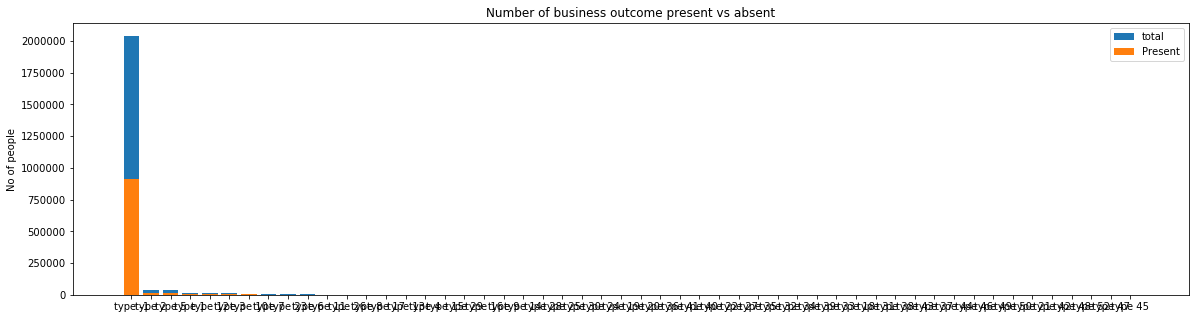

   char_1_y  outcome    total       Avg
0   type -1   910666  2039676  0.446476
12   type 2    17422    38030  0.458112
45   type 5    14402    34509  0.417340
1    type 1     5297    14938  0.354599
4   type 12     6204    14917  0.415901
   char_1_y  outcome  total       Avg
37  type 42        2      4  0.500000
43  type 48        0      3  0.000000
47  type 52        2      3  0.666667
42  type 47        0      2  0.000000
40  type 45        0      1  0.000000


In [ ]:
univariate_barplots(tot1_dat, 'char_1_y', 'outcome', False)

* Type -1 forms the majority as char_1 is only applicale for type_1 activity category values.
* type 52 values have highest business approval percentage even though their count is very less.

<h3>Char_2 of activity</h3>

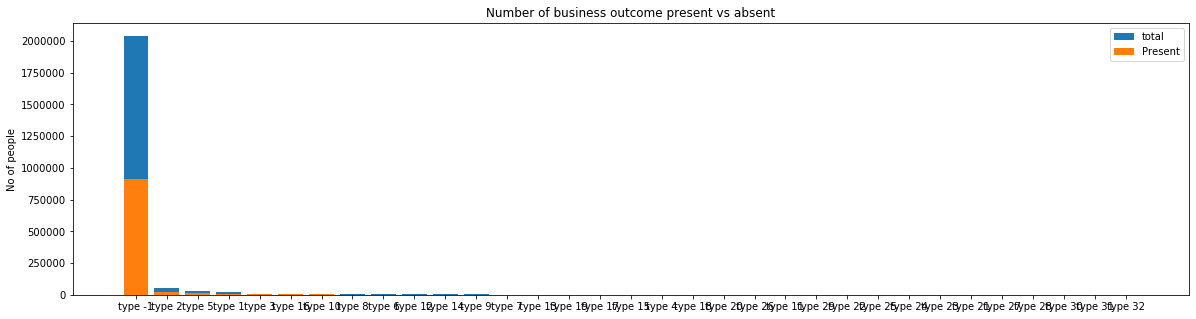

   char_2_y  outcome    total       Avg
0   type -1   910666  2039676  0.446476
12   type 2    21111    50524  0.417841
28   type 5    15233    31794  0.479116
1    type 1     7524    21616  0.348075
23   type 3     3549     9810  0.361774
   char_2_y  outcome  total       Avg
20  type 27       12     35  0.342857
21  type 28       10     17  0.588235
24  type 30        4      7  0.571429
25  type 31        4      7  0.571429
26  type 32        0      4  0.000000


In [ ]:
univariate_barplots(tot1_dat, 'char_2_y', 'outcome', False)

* type 28 has the highest business approval rate although it's count is very less.

<h3>Char_3 of activity</h3>

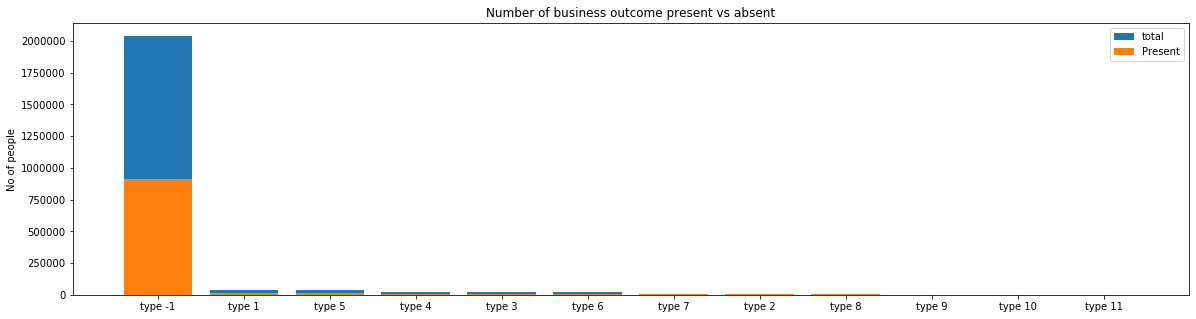

  char_3_y  outcome    total       Avg
0  type -1   910666  2039676  0.446476
1   type 1    14980    38224  0.391900
7   type 5    16327    35488  0.460071
6   type 4     8295    20466  0.405306
5   type 3     7837    19637  0.399094
   char_3_y  outcome  total       Avg
4    type 2     2489   6577  0.378440
10   type 8     3047   6473  0.470725
11   type 9      541   1328  0.407380
2   type 10        7     31  0.225806
3   type 11        2      5  0.400000


In [ ]:
univariate_barplots(tot1_dat, 'char_3_y', 'outcome', False)

* type 8 has the highest busiess approval percentage.

<h3>Char_4 of activity</h3>

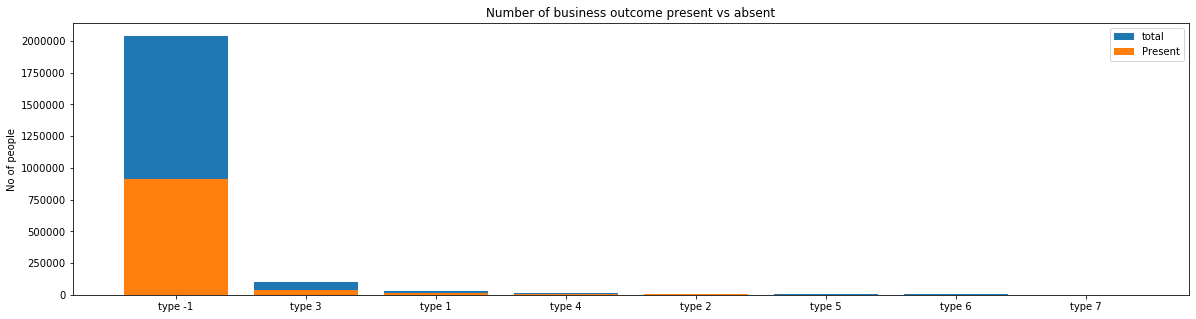

  char_4_y  outcome    total       Avg
0  type -1   910666  2039676  0.446476
3   type 3    41524    98131  0.423149
1   type 1    10567    27979  0.377676
4   type 4     6607    13730  0.481209
2   type 2     3775     9316  0.405217
  char_4_y  outcome  total       Avg
4   type 4     6607  13730  0.481209
2   type 2     3775   9316  0.405217
5   type 5     1509   5520  0.273370
6   type 6      846   2929  0.288836
7   type 7        3     10  0.300000


In [ ]:
univariate_barplots(tot1_dat, 'char_4_y', 'outcome', False)

* type 4 has the highest business approval percentage.

<h3>Char_5 of activity</h3>

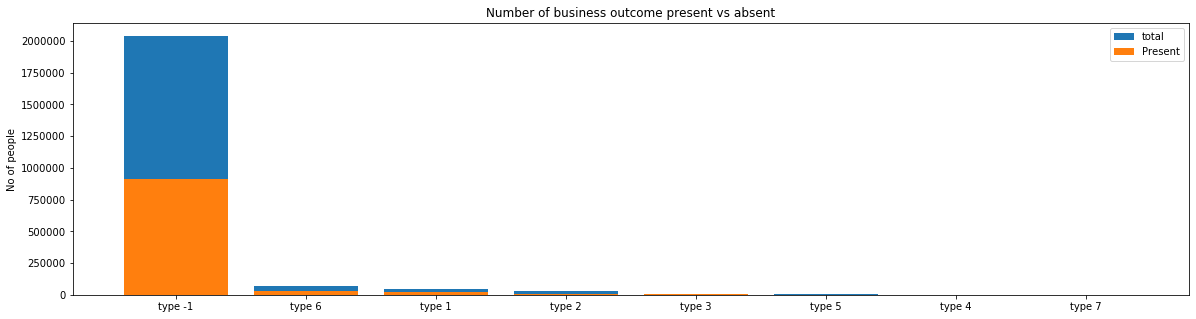

  char_5_y  outcome    total       Avg
0  type -1   910666  2039676  0.446476
6   type 6    29764    67989  0.437777
1   type 1    21674    49214  0.440403
2   type 2     7876    26982  0.291898
3   type 3     2762     6013  0.459338
  char_5_y  outcome  total       Avg
2   type 2     7876  26982  0.291898
3   type 3     2762   6013  0.459338
5   type 5     2061   5421  0.380188
4   type 4      694   1995  0.347870
7   type 7        0      1  0.000000


In [ ]:
univariate_barplots(tot1_dat, 'char_5_y', 'outcome', False)

* type 3 has the highest business approval percentage.

<h3>Char_6 of activity</h3>

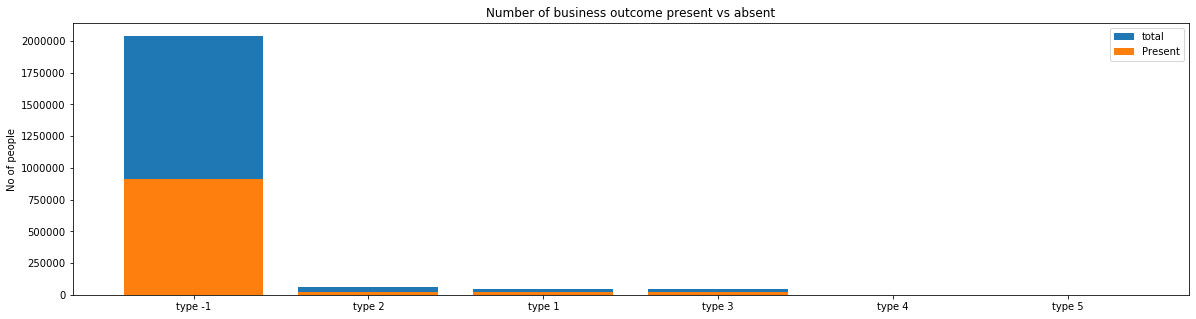

  char_6_y  outcome    total       Avg
0  type -1   910666  2039676  0.446476
2   type 2    22687    61026  0.371760
1   type 1    21140    48658  0.434461
3   type 3    20304    46124  0.440205
4   type 4      536     1241  0.431910
  char_6_y  outcome  total       Avg
2   type 2    22687  61026  0.371760
1   type 1    21140  48658  0.434461
3   type 3    20304  46124  0.440205
4   type 4      536   1241  0.431910
5   type 5      164    566  0.289753


In [ ]:
univariate_barplots(tot1_dat, 'char_6_y', 'outcome', False)

* type -1 has the highest business approval percentage.

<h3>Char_7 of activity</h3>

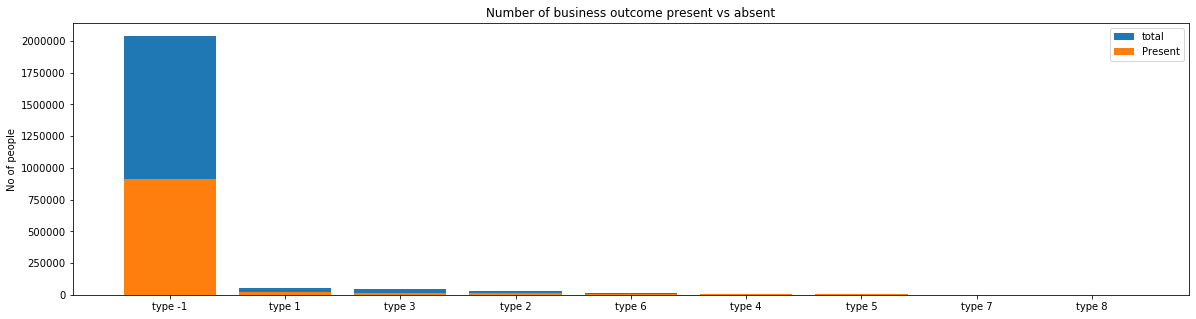

  char_7_y  outcome    total       Avg
0  type -1   910666  2039676  0.446476
1   type 1    22445    52548  0.427133
3   type 3    16179    42968  0.376536
2   type 2    13449    32199  0.417684
6   type 6     4527    10604  0.426914
  char_7_y  outcome  total       Avg
6   type 6     4527  10604  0.426914
4   type 4     3825   8751  0.437093
5   type 5     3290   8104  0.405972
7   type 7      826   1934  0.427094
8   type 8      290    507  0.571992


In [ ]:
univariate_barplots(tot1_dat, 'char_7_y', 'outcome', False)

* type 8 has the highest business approval percentage.

<h3>Char_8 of activity</h3>

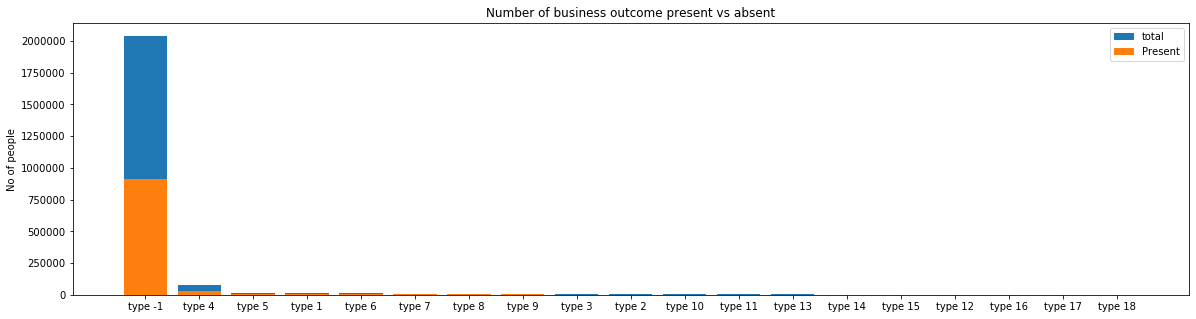

   char_8_y  outcome    total       Avg
0   type -1   910666  2039676  0.446476
13   type 4    32214    77460  0.415879
14   type 5     5479    12396  0.441997
1    type 1     4067    11621  0.349970
15   type 6     5017    10322  0.486049
   char_8_y  outcome  total       Avg
7   type 15      778   1511  0.514891
4   type 12      735   1471  0.499660
8   type 16      224    893  0.250840
9   type 17       43    237  0.181435
10  type 18      111    147  0.755102


In [ ]:
univariate_barplots(tot1_dat, 'char_8_y', 'outcome', False)

* type 15 has the highest business approval percentage.

<h3>Char_9 of activity</h3>

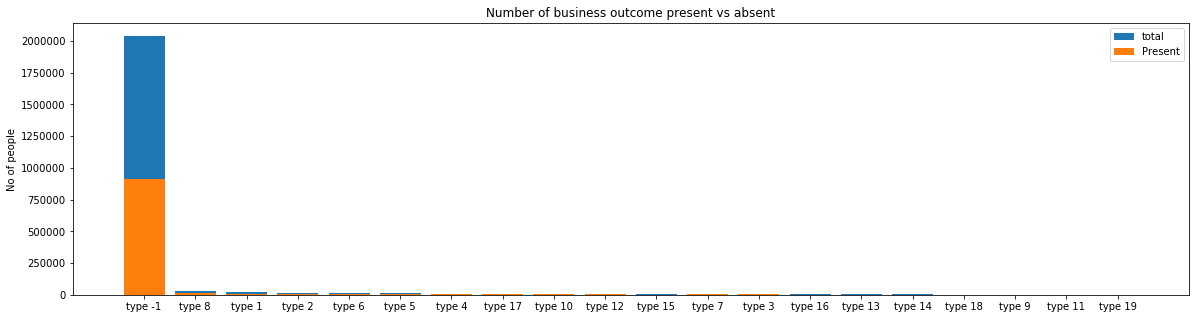

   char_9_y  outcome    total       Avg
0   type -1   910666  2039676  0.446476
18   type 8    15233    31794  0.479116
1    type 1     9467    24765  0.382273
12   type 2     4742    13488  0.351572
16   type 6     5313    12824  0.414301
   char_9_y  outcome  total       Avg
6   type 14      846   2545  0.332417
10  type 18      500   1341  0.372856
19   type 9      484    834  0.580336
3   type 11      100    455  0.219780
11  type 19      124    267  0.464419


In [ ]:
univariate_barplots(tot1_dat, 'char_9_y', 'outcome', False)

* type 9 has the highest business approval percentage.

<h3>Char_10 of activity</h3>

In [ ]:
findnull(tot2_dat,'char_10_y')

char_10_y 40092


In [15]:
tot1_dat.loc[tot1_dat["char_10_y"].isnull(),"char_10_y"]="type -1"
tot2_dat.loc[tot2_dat["char_10_y"].isnull(),"char_10_y"]="type -1"

In [ ]:
findnull(tot1_dat,'char_10_y')

no null values are present in char_10_y


In [ ]:
tot1_dat.char_10_y.nunique()

6516

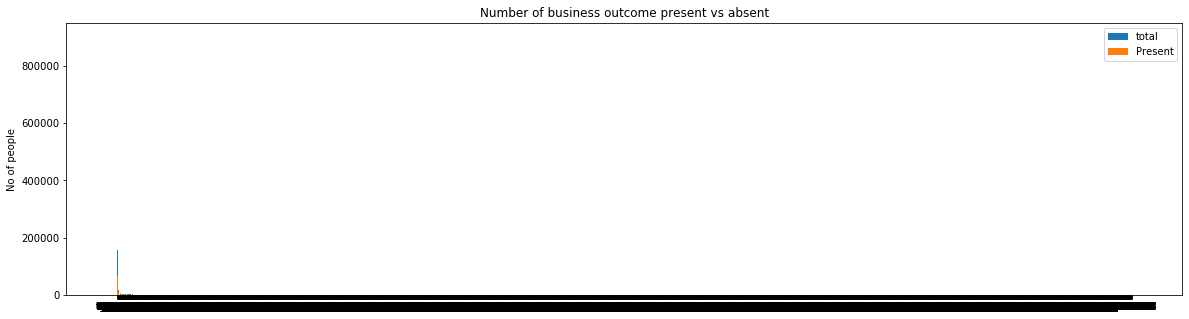

     char_10_y  outcome   total       Avg
1       type 1   461681  904683  0.510324
1330   type 23     9265  200408  0.046231
0      type -1    64831  157615  0.411325
1036    type 2    50493  116191  0.434569
4345   type 61    18201   35417  0.513906
      char_10_y  outcome  total  Avg
2146  type 3186        0      1  0.0
5665  type 7945        1      1  1.0
5666  type 7948        1      1  1.0
5674  type 7955        0      1  0.0
4295  type 5973        0      1  0.0


In [ ]:
univariate_barplots(tot1_dat, 'char_10_y', 'outcome', False)

* Barplots are not showing anything as the number of unique values is very high.

<h3>4. Time Series analysis</h3>

In [ ]:
tot1_dat.columns

Index(['people_id', 'char_1_x', 'group_1', 'char_2_x', 'ppl_date', 'char_3_x',
       'char_4_x', 'char_5_x', 'char_6_x', 'char_7_x', 'char_8_x', 'char_9_x',
       'char_10_x', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15',
       'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21',
       'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27',
       'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33',
       'char_34', 'char_35', 'char_36', 'char_37', 'char_38', 'activity_id',
       'actv_date', 'activity_category', 'char_1_y', 'char_2_y', 'char_3_y',
       'char_4_y', 'char_5_y', 'char_6_y', 'char_7_y', 'char_8_y', 'char_9_y',
       'char_10_y', 'outcome'],
      dtype='object')

In [16]:
tot1_dat['ppl_date'] = pd.to_datetime(tot1_dat['ppl_date'])
tot1_dat['actv_date'] = pd.to_datetime(tot1_dat['actv_date'])


In [17]:
tot1_dat['pplyear']= tot1_dat['ppl_date'].dt.year
tot1_dat['pplmonth']= tot1_dat['ppl_date'].dt.month
tot1_dat['pplday']= tot1_dat['ppl_date'].dt.day
tot1_dat['pplweek']= tot1_dat['ppl_date'].dt.week
tot1_dat['ppldayofweek']= tot1_dat['ppl_date'].dt.dayofweek


tot1_dat['actvyear']= tot1_dat['actv_date'].dt.year
tot1_dat['actvmonth']= tot1_dat['actv_date'].dt.month
tot1_dat['actvday']= tot1_dat['actv_date'].dt.day
tot1_dat['actvweek']= tot1_dat['actv_date'].dt.week
tot1_dat['actvdayofweek']= tot1_dat['actv_date'].dt.dayofweek

In [18]:
tot2_dat['ppl_date'] = pd.to_datetime(tot2_dat['ppl_date'])
tot2_dat['actv_date'] = pd.to_datetime(tot2_dat['actv_date'])

In [19]:
tot2_dat['pplyear']= tot2_dat['ppl_date'].dt.year
tot2_dat['pplmonth']= tot2_dat['ppl_date'].dt.month
tot2_dat['pplday']= tot2_dat['ppl_date'].dt.day
tot2_dat['pplweek']= tot2_dat['ppl_date'].dt.week
tot2_dat['ppldayofweek']= tot2_dat['ppl_date'].dt.dayofweek


tot2_dat['actvyear']= tot2_dat['actv_date'].dt.year
tot2_dat['actvmonth']= tot2_dat['actv_date'].dt.month
tot2_dat['actvday']= tot2_dat['actv_date'].dt.day
tot2_dat['actvweek']= tot2_dat['actv_date'].dt.week
tot2_dat['actvdayofweek']= tot2_dat['actv_date'].dt.dayofweek

<h3>4.1 Analysis of year</h3>

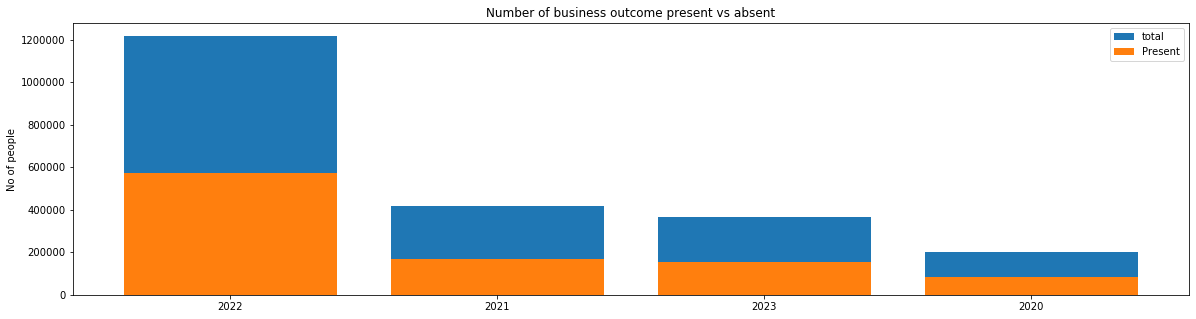

   pplyear  outcome    total       Avg
2     2022   570446  1217156  0.468671
1     2021   169019   415708  0.406581
3     2023   154562   365160  0.423272
0     2020    81470   199267  0.408848
   pplyear  outcome    total       Avg
2     2022   570446  1217156  0.468671
1     2021   169019   415708  0.406581
3     2023   154562   365160  0.423272
0     2020    81470   199267  0.408848


In [ ]:
univariate_barplots(tot1_dat, 'pplyear', 'outcome', False)

* Large number of groups people date are recorded in the year of 2022.
* The highest business approval percentage belongs to the year 2022.

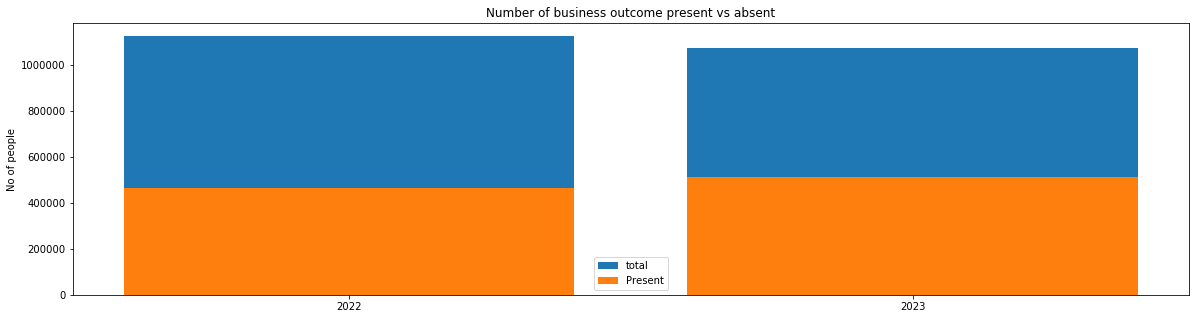

   actvyear  outcome    total       Avg
0      2022   462321  1124051  0.411299
1      2023   513176  1073240  0.478156
   actvyear  outcome    total       Avg
0      2022   462321  1124051  0.411299
1      2023   513176  1073240  0.478156


In [ ]:
univariate_barplots(tot1_dat, 'actvyear', 'outcome', False)

* Activities have only taken place in the year of 2022 & 2023.
* Highest number of activities have taken place in the year of 2022.
* Highest approval of business has happened in the yer of 2023.

<h3>4.2 Analysis of month</h3>

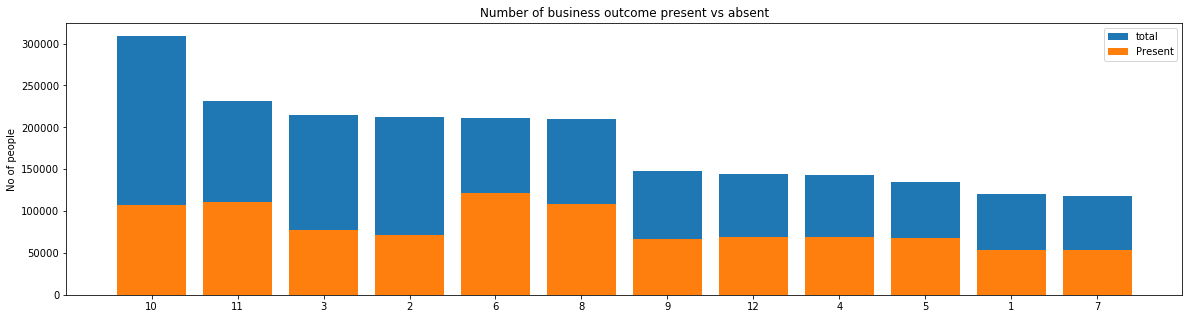

    pplmonth  outcome   total       Avg
9         10   106943  309125  0.345954
10        11   110441  231729  0.476596
2          3    77086  214936  0.358646
1          2    71374  212670  0.335609
5          6   121215  210635  0.575474
    pplmonth  outcome   total       Avg
11        12    69236  143839  0.481344
3          4    69594  143111  0.486294
4          5    67381  134662  0.500371
0          1    53904  120043  0.449039
6          7    53228  118287  0.449990


In [ ]:
univariate_barplots(tot1_dat, 'pplmonth', 'outcome', 12)

 
* More people dates are recorded in the month of 10 i.e. October.
* The highest business approval percentage belongs to the month 6 i.e June.

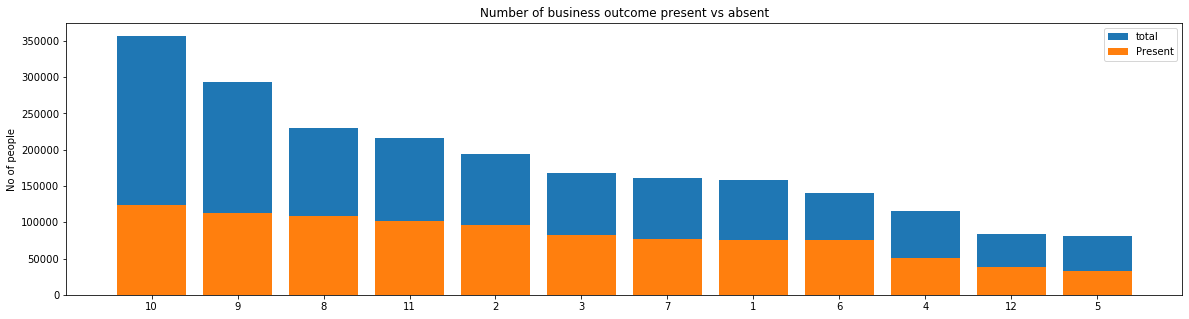

    actvmonth  outcome   total       Avg
9          10   123406  356775  0.345893
8           9   112799  293021  0.384952
7           8   108906  229301  0.474948
10         11   101595  215922  0.470517
1           2    96064  194498  0.493907
    actvmonth  outcome   total       Avg
0           1    76042  158153  0.480813
5           6    76036  139844  0.543720
3           4    50261  115922  0.433576
11         12    38966   83701  0.465538
4           5    32792   81716  0.401292


In [ ]:
univariate_barplots(tot1_dat, 'actvmonth', 'outcome', 12)

 
* More activities are recorded in the month of 10 i.e. October.
* The highest business approval percentage belongs to the month 6 i.e June.

<h3>4.3 Analysis of day</h3>

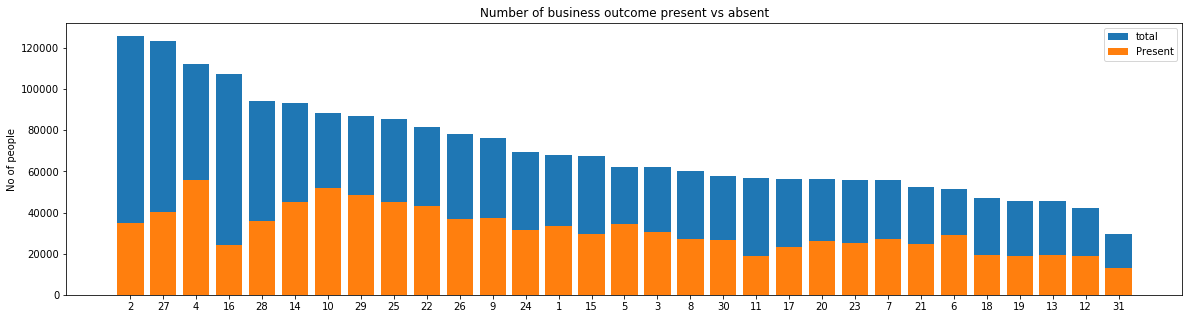

    pplday  outcome   total       Avg
1        2    34934  125877  0.277525
26      27    40445  123317  0.327976
3        4    55952  112214  0.498619
15      16    24382  107323  0.227183
27      28    35728   94208  0.379246
    pplday  outcome  total       Avg
17      18    19270  47079  0.409312
18      19    18645  45804  0.407061
12      13    19296  45658  0.422620
11      12    18791  42368  0.443519
30      31    12915  29783  0.433637


In [ ]:
univariate_barplots(tot1_dat, 'pplday', 'outcome', False)

* The highest number of people dates are recorded on 2nd of the month.
* The lowest number of people dates are recorded on 31st of the month.

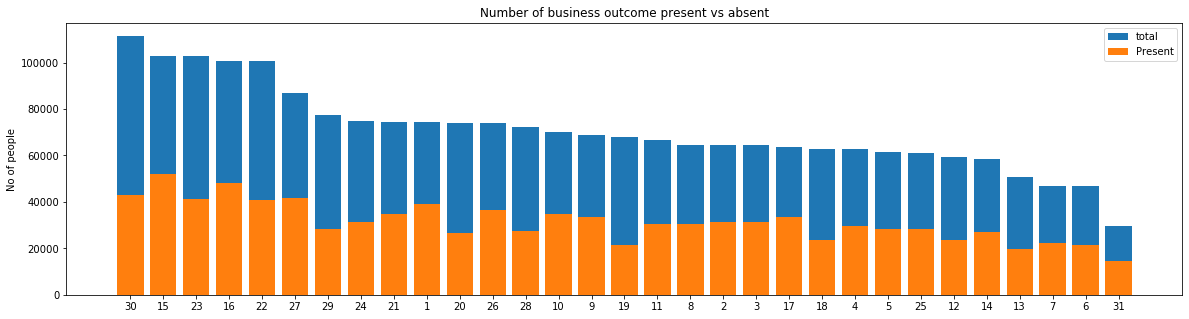

    actvday  outcome   total       Avg
29       30    43082  111440  0.386594
14       15    51855  102972  0.503583
22       23    41206  102801  0.400833
15       16    48262  100796  0.478809
21       22    40719  100570  0.404882
    actvday  outcome  total       Avg
13       14    27121  58517  0.463472
12       13    19526  50609  0.385821
6         7    22135  46822  0.472748
5         6    21502  46763  0.459808
30       31    14419  29819  0.483551


In [ ]:
univariate_barplots(tot1_dat, 'actvday', 'outcome', False)

* The highest number of activities are recorded on 30th of the month.
* The lowest number of actvities are recorded on 31st of the month.

<h3>4.4 Analysis of week</h3>

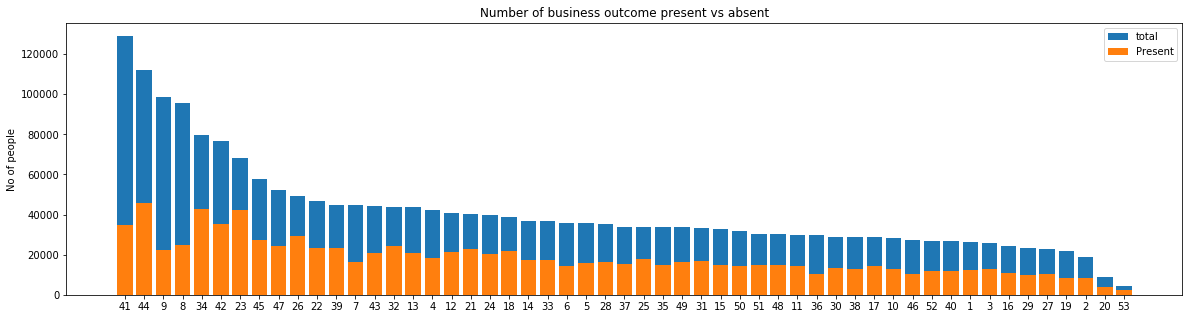

    pplweek  outcome   total       Avg
40       41    34808  129071  0.269681
43       44    45632  111905  0.407774
8         9    22165   98390  0.225277
7         8    24711   95792  0.257965
33       34    42597   79700  0.534467
    pplweek  outcome  total       Avg
26       27    10329  22617  0.456692
18       19     8499  21921  0.387710
1         2     8295  18917  0.438494
19       20     3720   9089  0.409286
52       53     2515   4576  0.549607


In [ ]:
univariate_barplots(tot1_dat, 'pplweek', 'outcome', False)

* Week 41 & 44 have recorded the highest number of people dates.
* Week 53 has recorded the lowest number of people dates.


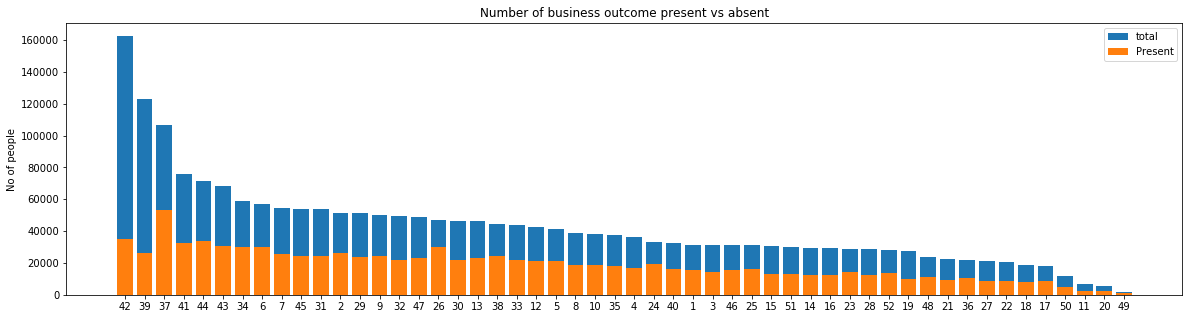

    actvweek  outcome   total       Avg
41        42    35100  162574  0.215902
38        39    26481  122791  0.215659
36        37    53148  106741  0.497916
40        41    32509   75937  0.428105
43        44    34060   71682  0.475154
    actvweek  outcome  total       Avg
16        17     8879  18380  0.483079
49        50     5172  12106  0.427226
10        11     2583   6953  0.371494
19        20     2331   5477  0.425598
48        49      877   1961  0.447221


In [ ]:
univariate_barplots(tot1_dat, 'actvweek', 'outcome', False)

* Week 42 & 39 have recorded the highest number of activities.
* Week 49 has recorded the lowest number of activities.


<h3>4.5 Analysis of dayofweek</h3>

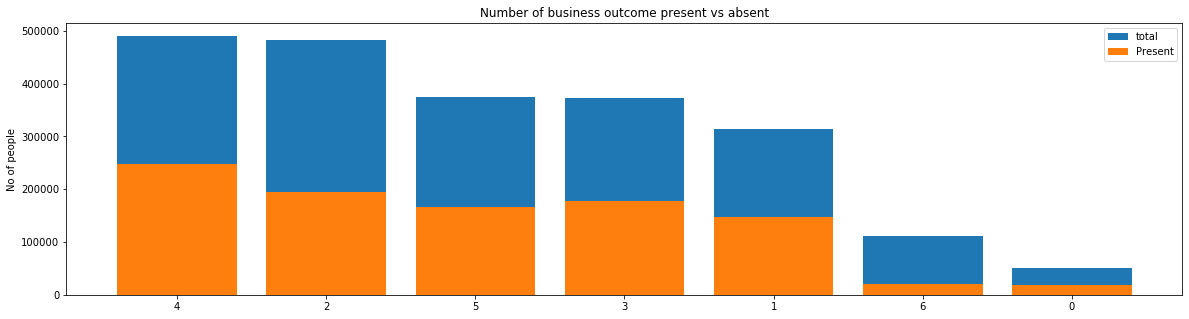

   ppldayofweek  outcome   total       Avg
4             4   247547  490455  0.504729
2             2   195597  483096  0.404882
5             5   166706  375658  0.443771
3             3   178384  373079  0.478140
1             1   146891  314043  0.467742
   ppldayofweek  outcome   total       Avg
5             5   166706  375658  0.443771
3             3   178384  373079  0.478140
1             1   146891  314043  0.467742
6             6    21359  110832  0.192715
0             0    19013   50128  0.379289


In [ ]:
univariate_barplots(tot1_dat, 'ppldayofweek', 'outcome', False)

* Day 4 has recorded the highest number of people dates.
* Day 4 also has the highest percentage of busiess approval.
* Day 0 has recorded the lowest number of people dates.

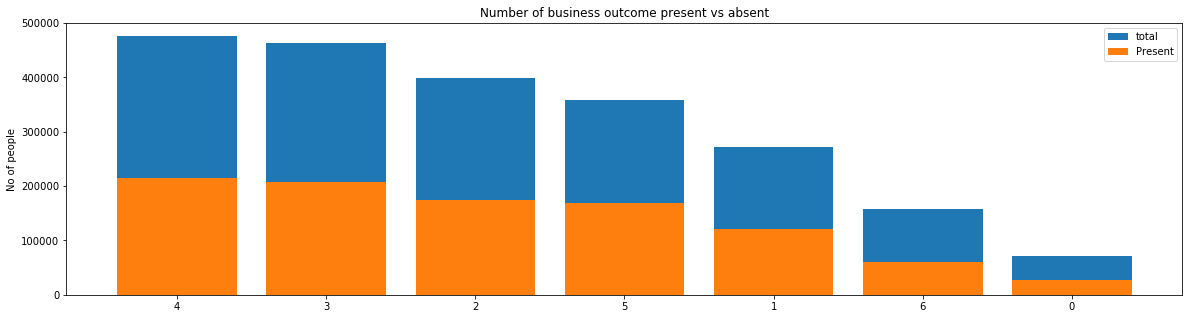

   actvdayofweek  outcome   total       Avg
4              4   215472  476447  0.452248
3              3   208239  463751  0.449032
2              2   174531  398565  0.437898
5              5   168974  358522  0.471307
1              1   121691  271435  0.448325
   actvdayofweek  outcome   total       Avg
2              2   174531  398565  0.437898
5              5   168974  358522  0.471307
1              1   121691  271435  0.448325
6              6    60213  157228  0.382966
0              0    26377   71343  0.369721


In [ ]:
univariate_barplots(tot1_dat, 'actvdayofweek', 'outcome', False)

* Day 4 has recorded the highest number of activities.
* Day 5 has the highest percentage of busiess approval.
* Day 0 has recorded the lowest number of activities.

<h3>5. Analysis of change in outcome of groups</h3>

In [ ]:
len(tot1_dat["group_1"].unique())

29899

In [ ]:
tot1_dat["group_1"]

0          group 17304
1          group 17304
2          group 17304
3          group 17304
4          group 17304
              ...     
2197286    group 17764
2197287    group 17764
2197288    group 17764
2197289    group 17764
2197290    group 17764
Name: group_1, Length: 2197291, dtype: object

In [ ]:
def getchangeinoutcomeType(data):
    meanval = data.mean()
    if meanval == 1.0 :
        return 1
    if meanval == 0.0:
        return 0
    return 2

In [ ]:
train_dat_ocomtyp=tot1_dat.groupby('group_1')['outcome'].apply(getchangeinoutcomeType)
train_dat_ocomtyp=train_dat_ocomtyp.to_frame().reset_index()

In [ ]:
train_dat_ocomtyp.rename(columns={"outcome": "outcome_type"},inplace=True)


In [ ]:
tot1_dat = pd.merge(tot1_dat,train_dat_ocomtyp,on='group_1',how='left')

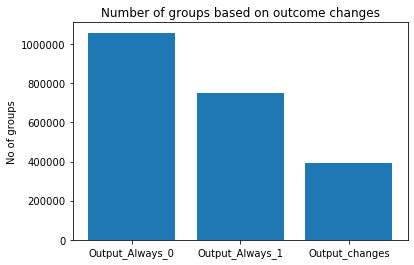

In [ ]:
otpttyp=tot1_dat.groupby('outcome_type')['outcome'].count().to_frame().reset_index()
otpttyp.rename(columns={"outcome": "outcome_count"},inplace=True)
otpttyp["outpt_descrip"]=["Output_Always_0","Output_Always_1","Output_changes"]
p1 = plt.bar(otpttyp['outpt_descrip'],otpttyp['outcome_count'].values)
plt.ylabel('No of groups')
plt.title('Number of groups based on outcome changes')
plt.show()

In [ ]:
otpttyp

outcome_type  outcome_count    outpt_descrip
0             0        1057390  Output_Always_0
1             1         747967  Output_Always_1
2             2         391934   Output_changes

* The groups with only 0 business outcome has highest count.

<h2>6. Bivariate Analysis</h2>

In [ ]:
tot1_dat.columns

Index(['people_id', 'char_1_x', 'group_1', 'char_2_x', 'date_x', 'char_3_x',
       'char_4_x', 'char_5_x', 'char_6_x', 'char_7_x', 'char_8_x', 'char_9_x',
       'char_10_x', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15',
       'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21',
       'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27',
       'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33',
       'char_34', 'char_35', 'char_36', 'char_37', 'char_38', 'activity_id',
       'date_y', 'activity_category', 'char_1_y', 'char_2_y', 'char_3_y',
       'char_4_y', 'char_5_y', 'char_6_y', 'char_7_y', 'char_8_y', 'char_9_y',
       'char_10_y', 'outcome', 'year', 'month', 'day', 'week', 'dayofweek'],
      dtype='object')

<h2>Char_1 and Char_2(People)</h2>

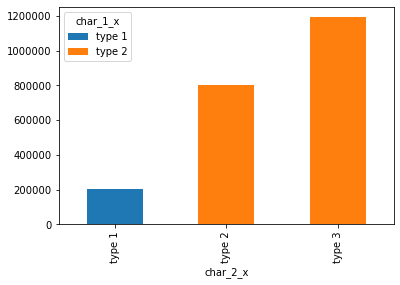

In [ ]:
pd.crosstab(tot1_dat['char_2_x'], tot1_dat['char_1_x']).plot(kind='bar', stacked=True)

* People Char_1 type_1 only comes up when Char_2 has type_1 value. 
* Char_1 is always Type_2 for other types of char_2.

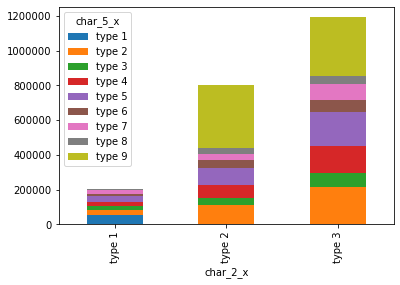

In [ ]:
pd.crosstab(tot1_dat['char_2_x'], tot1_dat['char_5_x']).plot(kind='bar', stacked=True,legend=True)

* For char_5 type_9  value does not come for type_1 value of Char_2.

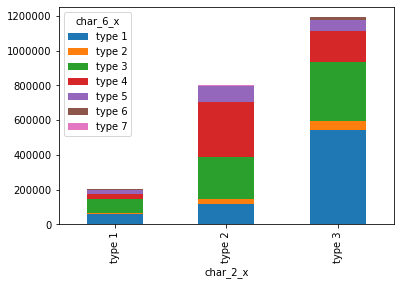

In [ ]:
pd.crosstab(tot1_dat['char_2_x'], tot1_dat['char_6_x']).plot(kind='bar', stacked=True,legend=True)

* type_7 value of char_6 does not occur for char_2.

* From all the above plots ,it is clear that the value of char_2 as type 2 is an important factor in determining the  business outcome.


<h2>Char_5 and Char_6(People)</h2>

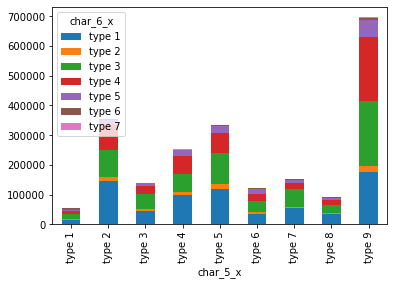

In [ ]:
pd.crosstab(tot1_dat['char_5_x'], tot1_dat['char_6_x']).plot(kind='bar', stacked=True)

* It is clear that type 2,type 3 and type 4 values of char_6 impact all the values of char_5.

<h2>Char_7 and Char_8(People)</h2>

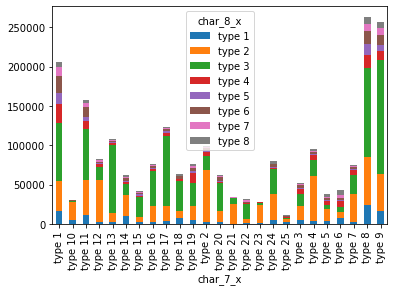

In [ ]:
pd.crosstab(tot1_dat['char_7_x'], tot1_dat['char_8_x']).plot(kind='bar', stacked=True)

* It is clear that type 2and type 3 values of char_8 impact all the values of char_7.

## Summary of EDA

* Char1 to Char9 do not have any consistent trend.
* Group 17304 always leads to 0 business outcome.
* Char_10 to Char_37 show similar trend where true value increases the approval of business outcome.
* Char_38 has numerical values where 90% of data have value less than 90.
* Char_1 to Char_9 for activity do not have any consistent trend.
* Majority of data is recorded in the year of 2022.
* Activities are mostly recorded in the month of October.
* Most of activities are performed o last  day of the month.

<h2>Feature Engineering</h2>

In [20]:
# New feature is added to merge both train & test data for feature engineering
tot1_dat['is_train']=1
tot2_dat['is_train']=0
tot2_dat['outcome']=np.NaN

In [21]:
full_dat=tot1_dat.append(tot2_dat,ignore_index=True,sort=True)

* <h5>group_ppl_cnt:Number of people per each group

In [22]:
import joblib
group_1=full_dat['group_1'].values
dict_lis=dict(full_dat.groupby("group_1").people_id.nunique())
joblib.dump(dict_lis,"grppeoplecntdict.pkl")
full_dat['group_ppl_cnt']=[dict_lis[i] for i in group_1 ]

* <h5>days_from_min_dt_grp:Days passed from Min ppl date per group

In [23]:
dic_lis=dict(full_dat.groupby("group_1").ppl_date.min())
joblib.dump(dic_lis,"group_min_dt.pkl")
group_min_dt=[dic_lis[i] for i in group_1 ]


In [25]:
group_1_ppl_dt=full_dat['ppl_date']

In [26]:
tser=pd.Series(group_min_dt)

In [27]:
full_dat['days_from_min_dt_grp']=(group_1_ppl_dt-tser).abs().dt.days

* <h5>days_from_min_dt_grp:Days passed from Max ppl date per group

In [28]:
dic_lis=dict(full_dat.groupby("group_1").ppl_date.max())
joblib.dump(dic_lis,"group_max_dt.pkl")
group_max_dt=[dic_lis[i] for i in group_1 ]
tsermx=pd.Series(group_max_dt)
full_dat['days_from_max_dt_grp']=(tsermx-group_1_ppl_dt).abs().dt.days

* <h5>Mean,median of Char_38

In [33]:
full_dat['people_38_mean']=full_dat['char_38'].mean()

full_dat['people_38_median']=full_dat['char_38'].median()

In [29]:
print(full_dat['char_38'].mean())

50.748712341124445


In [30]:
print(full_dat['char_38'].median())

60.0


* <h5>group_activity_cnt:Number of activities per group

In [31]:
dic_lis=dict(full_dat.groupby("group_1").activity_id.nunique())
joblib.dump(dic_lis,"group_activity_cnt.pkl")
full_dat['group_activity_cnt']=[dict_lis[i] for i in group_1 ]

 * <h5>activt_per_ppl_cnt:Number of activities per people

In [10]:
import joblib
people_id_list=full_dat['people_id'].values
dict_lis=dict(full_dat.groupby("people_id").activity_id.nunique())
joblib.dump(dict_lis,"activt_per_ppl_cnt.pkl")
full_dat['activt_per_ppl_cnt']=[dict_lis[i] for i in people_id_list ]

 * <h5>ppl_actv_date_diff:Absolute difference between ppl dat and activity date

In [34]:
full_dat['ppl_actv_date_diff']=(full_dat['ppl_date']-full_dat['actv_date']).abs().dt.days

 * <h5>weekend:Weekend or not

In [35]:
full_dat['weekend']=0
full_dat.loc[full_dat['actvdayofweek'].isin([5, 6]), 'weekend'] = 1

 * <h5>actv_date_qurtr: Quarter of the activity

In [36]:
full_dat['actv_date_qurtr']=full_dat['actv_date'].dt.quarter

In [ ]:
full_dat.head()

activity_category   activity_id  actv_date  actvday  actvdayofweek  \
0            type 4  act2_1734928 2023-08-26       26              5   
1            type 2  act2_2434093 2022-09-27       27              1   
2            type 2  act2_3404049 2022-09-27       27              1   
3            type 2  act2_3651215 2023-08-04        4              4   
4            type 2  act2_4109017 2023-08-26       26              5   

   actvmonth  actvweek  actvyear  char_10_x char_10_y  ...  group_ppl_cnt  \
0          8        34      2023       True   type 76  ...          77314   
1          9        39      2022       True    type 1  ...          77314   
2          9        39      2022       True    type 1  ...          77314   
3          8        31      2023       True    type 1  ...          77314   
4          8        34      2023       True    type 1  ...          77314   

   days_from_min_dt_grp  days_from_max_dt_grp  people_38_mean  \
0                   407                   793       50.748712   
1                   407                   793       50.748712   
2                   407                   793       50.748712   
3                   407                   793       50.748712   
4                   407                   793       50.748712   

   people_38_median  group_activity_cnt  activt_per_ppl_cnt  \
0              60.0               77314                   6   
1              60.0               77314                   6   
2              60.0               77314                   6   
3              60.0               77314                   6   
4              60.0               77314                   6   

   ppl_actv_date_diff  weekend actv_date_qurtr  
0                 788        1               3  
1                 455        0               3  
2                 455        0               3  
3                 766        0               3  
4                 788        1               3  

[5 rows x 76 columns]

In [ ]:
full_dat.to_csv("/content/drive/MyDrive/colabfold/Preprocessed_full_data.csv")

In [2]:
#full_dat=pd.read_csv("/content/drive/MyDrive/colabfold/Preprocessed_full_data.csv")
full_dat=pd.read_csv("Preprocessed_full_data.csv")

In [7]:
full_dat.loc[full_dat['people_id']=='ppl_100004']

Unnamed: 0 activity_category  activity_id   actv_date  actvday  \
2197291     2197291            type 1  act1_249281  2022-07-20       20   
2197292     2197292            type 5  act2_230855  2022-07-20       20   

         actvdayofweek  actvmonth  actvweek  actvyear  char_10_x  ...  \
2197291              2          7        29      2022       True  ...   
2197292              2          7        29      2022       True  ...   

        group_ppl_cnt  days_from_min_dt_grp  days_from_max_dt_grp  \
2197291             2                   356                     0   
2197292             2                   356                     0   

         people_38_mean  people_38_median  group_activity_cnt  \
2197291       50.748712              60.0                   2   
2197292       50.748712              60.0                   2   

         activt_per_ppl_cnt  ppl_actv_date_diff  weekend  actv_date_qurtr  
2197291                   2                   0        0                3  
2197292                   2                   0        0                3  

[2 rows x 77 columns]

In [ ]:
full_dat.drop(['Unnamed: 0','index'],axis=1,inplace=True)
full_dat.head()

activity_category   activity_id   actv_date  actvday  actvdayofweek  \
0            type 2  act2_1233489  2022-11-23       23              2   
1            type 2  act2_1623405  2022-11-23       23              2   
2            type 2  act2_1111598  2023-02-07        7              1   
3            type 2  act2_1177453  2023-06-28       28              2   
4            type 4   act2_133509  2022-08-10       10              2   

   actvmonth  actvweek  actvyear  char_10_x char_10_y  ...  group_ppl_cnt  \
0         11        47      2022      False    type 1  ...              5   
1         11        47      2022      False    type 1  ...              5   
2          2         6      2023       True    type 1  ...              1   
3          6        26      2023       True    type 1  ...              1   
4          8        32      2022       True  type 894  ...              1   

   days_from_min_dt_grp  days_from_max_dt_grp  people_38_mean  \
0                     0                   939       50.748712   
1                     0                   939       50.748712   
2                     0                     0       50.748712   
3                     0                     0       50.748712   
4                     0                     0       50.748712   

   people_38_median  group_activity_cnt  activt_per_ppl_cnt  \
0              60.0                   5                   2   
1              60.0                   5                   2   
2              60.0                   1                  34   
3              60.0                   1                  34   
4              60.0                   1                  34   

   ppl_actv_date_diff  weekend actv_date_qurtr  
0                 686        0               4  
1                 686        0               4  
2                 242        0               1  
3                 383        0               2  
4                  61        0               3  

[5 rows x 76 columns]

In [3]:
Train_dat=full_dat.loc[full_dat["is_train"]==1]
Test_dat=full_dat.loc[full_dat["is_train"]==0]
Train_outcome=Train_dat['outcome'].values

In [4]:
Test_dat.reset_index(inplace=True)

In [ ]:
Test_dat.head()

index  Unnamed: 0 activity_category   activity_id   actv_date  actvday  \
0  2197291     2197291            type 1   act1_249281  2022-07-20       20   
1  2197292     2197292            type 5   act2_230855  2022-07-20       20   
2  2197293     2197293            type 1   act1_240724  2022-10-14       14   
3  2197294     2197294            type 1    act1_83552  2022-11-27       27   
4  2197295     2197295            type 5  act2_1043301  2022-10-15       15   

   actvdayofweek  actvmonth  actvweek  actvyear  ...  group_ppl_cnt  \
0              2          7        29      2022  ...              2   
1              2          7        29      2022  ...              2   
2              4         10        41      2022  ...             16   
3              6         11        47      2022  ...             16   
4              5         10        41      2022  ...             16   

  days_from_min_dt_grp  days_from_max_dt_grp  people_38_mean  \
0                  356                     0       50.748712   
1                  356                     0       50.748712   
2                  345                   252       50.748712   
3                  345                   252       50.748712   
4                  345                   252       50.748712   

   people_38_median  group_activity_cnt  activt_per_ppl_cnt  \
0              60.0                   2                   2   
1              60.0                   2                   2   
2              60.0                  16                  25   
3              60.0                  16                  25   
4              60.0                  16                  25   

   ppl_actv_date_diff  weekend  actv_date_qurtr  
0                   0        0                3  
1                   0        0                3  
2                   0        0                4  
3                  44        1                4  
4                   1        1                4  

[5 rows x 78 columns]

## Data splitting & Upsampling

In [5]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(dataquepnt, classf, test_size=0.33, stratify=classf)
X_train, X_cv, y_train, y_cv = train_test_split(Train_dat, Train_outcome, test_size=0.33, stratify=Train_outcome)

In [6]:
positive_grp=X_train.loc[X_train["outcome"]==1.0]
negative_grp=X_train.loc[X_train["outcome"]==0.0]

In [7]:
positive_grp.shape

(653583, 77)

In [8]:
negative_grp.shape

(818601, 77)

In [9]:
from sklearn.utils import resample
positive_grp_upsampled=resample(positive_grp,replace=True,n_samples=818601,random_state=123)

In [10]:
X_train=pd.concat([positive_grp_upsampled,negative_grp],ignore_index =True)

In [11]:
y_train=X_train['outcome'].values

In [12]:
X_train.shape

(1637202, 77)

## One hot encoding

In [13]:
import joblib

In [14]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['activity_category'].values.reshape(-1,1))
joblib.dump(ohe,"activity_category_ohe.pkl")
X_train_actv_cat=ohe.transform(X_train['activity_category'].values.reshape(-1,1))
X_cv_actv_cat=ohe.transform(X_cv['activity_category'].values.reshape(-1,1))
X_test_actv_cat=ohe.transform(Test_dat['activity_category'].values.reshape(-1,1))

In [15]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['activity_id'].values.reshape(-1,1))
joblib.dump(ohe,"activity_id_ohe.pkl")
X_train_actv_id=ohe.transform(X_train['activity_id'].values.reshape(-1,1))
X_cv_actv_id=ohe.transform(X_cv['activity_id'].values.reshape(-1,1))
X_test_actv_id=ohe.transform(Test_dat['activity_id'].values.reshape(-1,1))

In [16]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['actvday'].values.reshape(-1,1))
joblib.dump(ohe,"actvday_ohe.pkl")
X_train_actv_day=ohe.transform(X_train['actvday'].values.reshape(-1,1))
X_cv_actv_day=ohe.transform(X_cv['actvday'].values.reshape(-1,1))
X_test_actv_day=ohe.transform(Test_dat['actvday'].values.reshape(-1,1))

In [17]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['actvdayofweek'].values.reshape(-1,1))
joblib.dump(ohe,"actvdayofweek.pkl")
X_train_actv_dayowek=ohe.transform(X_train['actvdayofweek'].values.reshape(-1,1))
X_cv_actv_dayowek=ohe.transform(X_cv['actvdayofweek'].values.reshape(-1,1))
X_test_actv_dayowek=ohe.transform(Test_dat['actvdayofweek'].values.reshape(-1,1))

In [18]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['actvmonth'].values.reshape(-1,1))
joblib.dump(ohe,"actvmonth_ohe.pkl")
X_train_actv_mnth=ohe.transform(X_train['actvmonth'].values.reshape(-1,1))
X_cv_actv_mnth=ohe.transform(X_cv['actvmonth'].values.reshape(-1,1))
X_test_actv_mnth=ohe.transform(Test_dat['actvmonth'].values.reshape(-1,1))

In [19]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['actvweek'].values.reshape(-1,1))
joblib.dump(ohe,"actvweek_ohe.pkl")
X_train_actv_week=ohe.transform(X_train['actvweek'].values.reshape(-1,1))
X_cv_actv_week=ohe.transform(X_cv['actvweek'].values.reshape(-1,1))
X_test_actv_week=ohe.transform(Test_dat['actvweek'].values.reshape(-1,1))

In [20]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['actvyear'].values.reshape(-1,1))
joblib.dump(ohe,"actvyear_ohe.pkl")
X_train_actv_year=ohe.transform(X_train['actvyear'].values.reshape(-1,1))
X_cv_actv_year=ohe.transform(X_cv['actvyear'].values.reshape(-1,1))
X_test_actv_year=ohe.transform(Test_dat['actvyear'].values.reshape(-1,1))

In [21]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_10_x'].values.reshape(-1,1))
joblib.dump(ohe,"char_10_x_ohe.pkl")
X_train_ch10x=ohe.transform(X_train['char_10_x'].values.reshape(-1,1))
X_cv_actv_ch10x=ohe.transform(X_cv['char_10_x'].values.reshape(-1,1))
X_test_actv_ch10x=ohe.transform(Test_dat['char_10_x'].values.reshape(-1,1))

In [22]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_10_x'].values.reshape(-1,1))
X_train_ch10x=ohe.transform(X_train['char_10_x'].values.reshape(-1,1))
X_cv_actv_ch10x=ohe.transform(X_cv['char_10_x'].values.reshape(-1,1))
X_test_actv_ch10x=ohe.transform(Test_dat['char_10_x'].values.reshape(-1,1))

In [23]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_10_y'].values.reshape(-1,1))
joblib.dump(ohe,"char_10_y_ohe.pkl")
X_train_ch10y=ohe.transform(X_train['char_10_y'].values.reshape(-1,1))
X_cv_actv_ch10y=ohe.transform(X_cv['char_10_y'].values.reshape(-1,1))
X_test_actv_ch10y=ohe.transform(Test_dat['char_10_y'].values.reshape(-1,1))

In [24]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_11'].values.reshape(-1,1))
joblib.dump(ohe,"char_11_ohe.pkl")
X_train_ch11=ohe.transform(X_train['char_11'].values.reshape(-1,1))
X_cv_actv_ch11=ohe.transform(X_cv['char_11'].values.reshape(-1,1))
X_test_actv_ch11=ohe.transform(Test_dat['char_11'].values.reshape(-1,1))

In [25]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_12'].values.reshape(-1,1))
joblib.dump(ohe,"char_12_ohe.pkl")
X_train_ch12=ohe.transform(X_train['char_12'].values.reshape(-1,1))
X_cv_actv_ch12=ohe.transform(X_cv['char_12'].values.reshape(-1,1))
X_test_actv_ch12=ohe.transform(Test_dat['char_12'].values.reshape(-1,1))

In [26]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_13'].values.reshape(-1,1))
joblib.dump(ohe,"char_13_ohe.pkl")
X_train_ch13=ohe.transform(X_train['char_13'].values.reshape(-1,1))
X_cv_actv_ch13=ohe.transform(X_cv['char_13'].values.reshape(-1,1))
X_test_actv_ch13=ohe.transform(Test_dat['char_13'].values.reshape(-1,1))

In [27]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_14'].values.reshape(-1,1))
joblib.dump(ohe,"char_14_ohe.pkl")
X_train_ch14=ohe.transform(X_train['char_14'].values.reshape(-1,1))
X_cv_actv_ch14=ohe.transform(X_cv['char_14'].values.reshape(-1,1))
X_test_actv_ch14=ohe.transform(Test_dat['char_14'].values.reshape(-1,1))

In [28]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_15'].values.reshape(-1,1))
joblib.dump(ohe,"char_15_ohe.pkl")
X_train_ch15=ohe.transform(X_train['char_15'].values.reshape(-1,1))
X_cv_actv_ch15=ohe.transform(X_cv['char_15'].values.reshape(-1,1))
X_test_actv_ch15=ohe.transform(Test_dat['char_15'].values.reshape(-1,1))

In [29]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_16'].values.reshape(-1,1))
joblib.dump(ohe,"char_16_ohe.pkl")
X_train_ch16=ohe.transform(X_train['char_16'].values.reshape(-1,1))
X_cv_actv_ch16=ohe.transform(X_cv['char_16'].values.reshape(-1,1))
X_test_actv_ch16=ohe.transform(Test_dat['char_16'].values.reshape(-1,1))

In [30]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_17'].values.reshape(-1,1))
joblib.dump(ohe,"char_17_ohe.pkl")
X_train_ch17=ohe.transform(X_train['char_17'].values.reshape(-1,1))
X_cv_actv_ch17=ohe.transform(X_cv['char_17'].values.reshape(-1,1))
X_test_actv_ch17=ohe.transform(Test_dat['char_17'].values.reshape(-1,1))

In [31]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_18'].values.reshape(-1,1))
joblib.dump(ohe,"char_18_ohe.pkl")
X_train_ch18=ohe.transform(X_train['char_18'].values.reshape(-1,1))
X_cv_actv_ch18=ohe.transform(X_cv['char_18'].values.reshape(-1,1))
X_test_actv_ch18=ohe.transform(Test_dat['char_18'].values.reshape(-1,1))

In [32]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_19'].values.reshape(-1,1))
joblib.dump(ohe,"char_19_ohe.pkl")
X_train_ch19=ohe.transform(X_train['char_19'].values.reshape(-1,1))
X_cv_actv_ch19=ohe.transform(X_cv['char_19'].values.reshape(-1,1))
X_test_actv_ch19=ohe.transform(Test_dat['char_19'].values.reshape(-1,1))

In [33]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_1_x'].values.reshape(-1,1))
joblib.dump(ohe,"char_1_x_ohe.pkl")
X_train_ch1x=ohe.transform(X_train['char_1_x'].values.reshape(-1,1))
X_cv_actv_ch1x=ohe.transform(X_cv['char_1_x'].values.reshape(-1,1))
X_test_actv_ch1x=ohe.transform(Test_dat['char_1_x'].values.reshape(-1,1))

In [34]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_1_y'].values.reshape(-1,1))
joblib.dump(ohe,"char_1_y_ohe.pkl")
X_train_ch1y=ohe.transform(X_train['char_1_y'].values.reshape(-1,1))
X_cv_actv_ch1y=ohe.transform(X_cv['char_1_y'].values.reshape(-1,1))
X_test_actv_ch1y=ohe.transform(Test_dat['char_1_y'].values.reshape(-1,1))

In [35]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_20'].values.reshape(-1,1))
joblib.dump(ohe,"char_20_ohe.pkl")
X_train_ch20=ohe.transform(X_train['char_20'].values.reshape(-1,1))
X_cv_actv_ch20=ohe.transform(X_cv['char_20'].values.reshape(-1,1))
X_test_actv_ch20=ohe.transform(Test_dat['char_20'].values.reshape(-1,1))

In [36]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_21'].values.reshape(-1,1))
joblib.dump(ohe,"char_21_ohe.pkl")
X_train_ch21=ohe.transform(X_train['char_21'].values.reshape(-1,1))
X_cv_actv_ch21=ohe.transform(X_cv['char_21'].values.reshape(-1,1))
X_test_actv_ch21=ohe.transform(Test_dat['char_21'].values.reshape(-1,1))

In [37]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_22'].values.reshape(-1,1))
joblib.dump(ohe,"char_22_ohe.pkl")
X_train_ch22=ohe.transform(X_train['char_22'].values.reshape(-1,1))
X_cv_actv_ch22=ohe.transform(X_cv['char_22'].values.reshape(-1,1))
X_test_actv_ch22=ohe.transform(Test_dat['char_22'].values.reshape(-1,1))

In [38]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_23'].values.reshape(-1,1))
joblib.dump(ohe,"char_23_ohe.pkl")
X_train_ch23=ohe.transform(X_train['char_23'].values.reshape(-1,1))
X_cv_actv_ch23=ohe.transform(X_cv['char_23'].values.reshape(-1,1))
X_test_actv_ch23=ohe.transform(Test_dat['char_23'].values.reshape(-1,1))

In [39]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_24'].values.reshape(-1,1))
joblib.dump(ohe,"char_24_ohe.pkl")
X_train_ch24=ohe.transform(X_train['char_24'].values.reshape(-1,1))
X_cv_actv_ch24=ohe.transform(X_cv['char_24'].values.reshape(-1,1))
X_test_actv_ch24=ohe.transform(Test_dat['char_24'].values.reshape(-1,1))

In [40]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_25'].values.reshape(-1,1))
joblib.dump(ohe,"char_25_ohe.pkl")
X_train_ch25=ohe.transform(X_train['char_25'].values.reshape(-1,1))
X_cv_actv_ch25=ohe.transform(X_cv['char_25'].values.reshape(-1,1))
X_test_actv_ch25=ohe.transform(Test_dat['char_25'].values.reshape(-1,1))

In [41]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_26'].values.reshape(-1,1))
joblib.dump(ohe,"char_26_ohe.pkl")
X_train_ch26=ohe.transform(X_train['char_26'].values.reshape(-1,1))
X_cv_actv_ch26=ohe.transform(X_cv['char_26'].values.reshape(-1,1))
X_test_actv_ch26=ohe.transform(Test_dat['char_26'].values.reshape(-1,1))

In [42]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_27'].values.reshape(-1,1))
joblib.dump(ohe,"char_27_ohe.pkl")
X_train_ch27=ohe.transform(X_train['char_27'].values.reshape(-1,1))
X_cv_actv_ch27=ohe.transform(X_cv['char_27'].values.reshape(-1,1))
X_test_actv_ch27=ohe.transform(Test_dat['char_27'].values.reshape(-1,1))

In [43]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_28'].values.reshape(-1,1))
joblib.dump(ohe,"char_28_ohe.pkl")
X_train_ch28=ohe.transform(X_train['char_28'].values.reshape(-1,1))
X_cv_actv_ch28=ohe.transform(X_cv['char_28'].values.reshape(-1,1))
X_test_actv_ch28=ohe.transform(Test_dat['char_28'].values.reshape(-1,1))

In [44]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_29'].values.reshape(-1,1))
joblib.dump(ohe,"char_29_ohe.pkl")
X_train_ch29=ohe.transform(X_train['char_29'].values.reshape(-1,1))
X_cv_actv_ch29=ohe.transform(X_cv['char_29'].values.reshape(-1,1))
X_test_actv_ch29=ohe.transform(Test_dat['char_29'].values.reshape(-1,1))

In [45]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_2_x'].values.reshape(-1,1))
joblib.dump(ohe,"char_2_x_ohe.pkl")
X_train_ch2x=ohe.transform(X_train['char_2_x'].values.reshape(-1,1))
X_cv_actv_ch2x=ohe.transform(X_cv['char_2_x'].values.reshape(-1,1))
X_test_actv_ch2x=ohe.transform(Test_dat['char_2_x'].values.reshape(-1,1))

In [46]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_2_y'].values.reshape(-1,1))
joblib.dump(ohe,"char_2_y_ohe.pkl")
X_train_ch2y=ohe.transform(X_train['char_2_y'].values.reshape(-1,1))
X_cv_actv_ch2y=ohe.transform(X_cv['char_2_y'].values.reshape(-1,1))
X_test_actv_ch2y=ohe.transform(Test_dat['char_2_y'].values.reshape(-1,1))

In [47]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_30'].values.reshape(-1,1))
joblib.dump(ohe,"char_30_ohe.pkl")
X_train_ch30=ohe.transform(X_train['char_30'].values.reshape(-1,1))
X_cv_actv_ch30=ohe.transform(X_cv['char_30'].values.reshape(-1,1))
X_test_actv_ch30=ohe.transform(Test_dat['char_30'].values.reshape(-1,1))

In [48]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_31'].values.reshape(-1,1))
joblib.dump(ohe,"char_31_ohe.pkl")
X_train_ch31=ohe.transform(X_train['char_31'].values.reshape(-1,1))
X_cv_actv_ch31=ohe.transform(X_cv['char_31'].values.reshape(-1,1))
X_test_actv_ch31=ohe.transform(Test_dat['char_31'].values.reshape(-1,1))

In [49]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_32'].values.reshape(-1,1))
joblib.dump(ohe,"char_32_ohe.pkl")
X_train_ch32=ohe.transform(X_train['char_32'].values.reshape(-1,1))
X_cv_actv_ch32=ohe.transform(X_cv['char_32'].values.reshape(-1,1))
X_test_actv_ch32=ohe.transform(Test_dat['char_32'].values.reshape(-1,1))

In [50]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_33'].values.reshape(-1,1))
joblib.dump(ohe,"char_33_ohe.pkl")
X_train_ch33=ohe.transform(X_train['char_33'].values.reshape(-1,1))
X_cv_actv_ch33=ohe.transform(X_cv['char_33'].values.reshape(-1,1))
X_test_actv_ch33=ohe.transform(Test_dat['char_33'].values.reshape(-1,1))

In [51]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_34'].values.reshape(-1,1))
joblib.dump(ohe,"char_34_ohe.pkl")
X_train_ch34=ohe.transform(X_train['char_34'].values.reshape(-1,1))
X_cv_actv_ch34=ohe.transform(X_cv['char_34'].values.reshape(-1,1))
X_test_actv_ch34=ohe.transform(Test_dat['char_34'].values.reshape(-1,1))

In [52]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_35'].values.reshape(-1,1))
joblib.dump(ohe,"char_35_ohe.pkl")
X_train_ch35=ohe.transform(X_train['char_35'].values.reshape(-1,1))
X_cv_actv_ch35=ohe.transform(X_cv['char_35'].values.reshape(-1,1))
X_test_actv_ch35=ohe.transform(Test_dat['char_35'].values.reshape(-1,1))

In [53]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_36'].values.reshape(-1,1))
joblib.dump(ohe,"char_36_ohe.pkl")
X_train_ch36=ohe.transform(X_train['char_36'].values.reshape(-1,1))
X_cv_actv_ch36=ohe.transform(X_cv['char_36'].values.reshape(-1,1))
X_test_actv_ch36=ohe.transform(Test_dat['char_36'].values.reshape(-1,1))

In [54]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_37'].values.reshape(-1,1))
joblib.dump(ohe,"char_37_ohe.pkl")
X_train_ch37=ohe.transform(X_train['char_37'].values.reshape(-1,1))
X_cv_actv_ch37=ohe.transform(X_cv['char_37'].values.reshape(-1,1))
X_test_actv_ch37=ohe.transform(Test_dat['char_37'].values.reshape(-1,1))

In [55]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_3_x'].values.reshape(-1,1))
joblib.dump(ohe,"char_3_x_ohe.pkl")
X_train_ch3x=ohe.transform(X_train['char_3_x'].values.reshape(-1,1))
X_cv_actv_ch3x=ohe.transform(X_cv['char_3_x'].values.reshape(-1,1))
X_test_actv_ch3x=ohe.transform(Test_dat['char_3_x'].values.reshape(-1,1))

In [56]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_3_y'].values.reshape(-1,1))
joblib.dump(ohe,"char_3_y_ohe.pkl")
X_train_ch3y=ohe.transform(X_train['char_3_y'].values.reshape(-1,1))
X_cv_actv_ch3y=ohe.transform(X_cv['char_3_y'].values.reshape(-1,1))
X_test_actv_ch3y=ohe.transform(Test_dat['char_3_y'].values.reshape(-1,1))

In [57]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_4_x'].values.reshape(-1,1))
joblib.dump(ohe,"char_4_x_ohe.pkl")
X_train_ch4x=ohe.transform(X_train['char_4_x'].values.reshape(-1,1))
X_cv_actv_ch4x=ohe.transform(X_cv['char_4_x'].values.reshape(-1,1))
X_test_actv_ch4x=ohe.transform(Test_dat['char_4_x'].values.reshape(-1,1))

In [58]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_4_y'].values.reshape(-1,1))
joblib.dump(ohe,"char_4_y_ohe.pkl")
X_train_ch4Y=ohe.transform(X_train['char_4_y'].values.reshape(-1,1))
X_cv_actv_ch4y=ohe.transform(X_cv['char_4_y'].values.reshape(-1,1))
X_test_actv_ch4y=ohe.transform(Test_dat['char_4_y'].values.reshape(-1,1))

In [59]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_5_x'].values.reshape(-1,1))
joblib.dump(ohe,"char_5_x_ohe.pkl")
X_train_ch5x=ohe.transform(X_train['char_5_x'].values.reshape(-1,1))
X_cv_actv_ch5x=ohe.transform(X_cv['char_5_x'].values.reshape(-1,1))
X_test_actv_ch5x=ohe.transform(Test_dat['char_5_x'].values.reshape(-1,1))

In [60]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_5_y'].values.reshape(-1,1))
joblib.dump(ohe,"char_5_y_ohe.pkl")
X_train_ch5y=ohe.transform(X_train['char_5_y'].values.reshape(-1,1))
X_cv_actv_ch5y=ohe.transform(X_cv['char_5_y'].values.reshape(-1,1))
X_test_actv_ch5y=ohe.transform(Test_dat['char_5_y'].values.reshape(-1,1))

In [61]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_6_x'].values.reshape(-1,1))
joblib.dump(ohe,"char_6_x_ohe.pkl")
X_train_ch6x=ohe.transform(X_train['char_6_x'].values.reshape(-1,1))
X_cv_actv_ch6x=ohe.transform(X_cv['char_6_x'].values.reshape(-1,1))
X_test_actv_ch6x=ohe.transform(Test_dat['char_6_x'].values.reshape(-1,1))

In [62]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_6_y'].values.reshape(-1,1))
joblib.dump(ohe,"char_6_y_ohe.pkl")
X_train_ch6y=ohe.transform(X_train['char_6_y'].values.reshape(-1,1))
X_cv_actv_ch6y=ohe.transform(X_cv['char_6_y'].values.reshape(-1,1))
X_test_actv_ch6y=ohe.transform(Test_dat['char_6_y'].values.reshape(-1,1))

In [63]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_7_x'].values.reshape(-1,1))
joblib.dump(ohe,"char_7_x_ohe.pkl")
X_train_ch7x=ohe.transform(X_train['char_7_x'].values.reshape(-1,1))
X_cv_actv_ch7x=ohe.transform(X_cv['char_7_x'].values.reshape(-1,1))
X_test_actv_ch7x=ohe.transform(Test_dat['char_7_x'].values.reshape(-1,1))

In [64]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_7_y'].values.reshape(-1,1))
joblib.dump(ohe,"char_7_y_ohe.pkl")
X_train_ch7y=ohe.transform(X_train['char_7_y'].values.reshape(-1,1))
X_cv_actv_ch7y=ohe.transform(X_cv['char_7_y'].values.reshape(-1,1))
X_test_actv_ch7y=ohe.transform(Test_dat['char_7_y'].values.reshape(-1,1))

In [65]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_8_x'].values.reshape(-1,1))
joblib.dump(ohe,"char_8_x_ohe.pkl")
X_train_ch8x=ohe.transform(X_train['char_8_x'].values.reshape(-1,1))
X_cv_actv_ch8x=ohe.transform(X_cv['char_8_x'].values.reshape(-1,1))
X_test_actv_ch8x=ohe.transform(Test_dat['char_8_x'].values.reshape(-1,1))

In [66]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_8_y'].values.reshape(-1,1))
joblib.dump(ohe,"char_8_y_ohe.pkl")
X_train_ch8y=ohe.transform(X_train['char_8_y'].values.reshape(-1,1))
X_cv_actv_ch8y=ohe.transform(X_cv['char_8_y'].values.reshape(-1,1))
X_test_actv_ch8y=ohe.transform(Test_dat['char_8_y'].values.reshape(-1,1))

In [67]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_9_x'].values.reshape(-1,1))
joblib.dump(ohe,"char_9_x_ohe.pkl")
X_train_ch9x=ohe.transform(X_train['char_9_x'].values.reshape(-1,1))
X_cv_actv_ch9x=ohe.transform(X_cv['char_9_x'].values.reshape(-1,1))
X_test_actv_ch9x=ohe.transform(Test_dat['char_9_x'].values.reshape(-1,1))

In [68]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['char_9_y'].values.reshape(-1,1))
joblib.dump(ohe,"char_9_y_ohe.pkl")
X_train_ch9y=ohe.transform(X_train['char_9_y'].values.reshape(-1,1))
X_cv_actv_ch9y=ohe.transform(X_cv['char_9_y'].values.reshape(-1,1))
X_test_actv_ch9y=ohe.transform(Test_dat['char_9_y'].values.reshape(-1,1))

In [69]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['group_1'].values.reshape(-1,1))
joblib.dump(ohe,"group_1_ohe.pkl")
X_train_grp1=ohe.transform(X_train['group_1'].values.reshape(-1,1))
X_cv_actv_grp1=ohe.transform(X_cv['group_1'].values.reshape(-1,1))
X_test_actv_grp1=ohe.transform(Test_dat['group_1'].values.reshape(-1,1))

In [70]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['people_id'].values.reshape(-1,1))
joblib.dump(ohe,"people_id_ohe.pkl")
X_train_pplid=ohe.transform(X_train['people_id'].values.reshape(-1,1))
X_cv_actv_pplid=ohe.transform(X_cv['people_id'].values.reshape(-1,1))
X_test_actv_pplid=ohe.transform(Test_dat['people_id'].values.reshape(-1,1))

In [71]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['pplday'].values.reshape(-1,1))
joblib.dump(ohe,"pplday_ohe.pkl")
X_train_pplday=ohe.transform(X_train['pplday'].values.reshape(-1,1))
X_cv_actv_pplday=ohe.transform(X_cv['pplday'].values.reshape(-1,1))
X_test_actv_pplday=ohe.transform(Test_dat['pplday'].values.reshape(-1,1))

In [72]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['ppldayofweek'].values.reshape(-1,1))
joblib.dump(ohe,"ppldayofweek_ohe.pkl")
X_train_ppldayowk=ohe.transform(X_train['ppldayofweek'].values.reshape(-1,1))
X_cv_actv_ppldayowk=ohe.transform(X_cv['ppldayofweek'].values.reshape(-1,1))
X_test_actv_ppldayowk=ohe.transform(Test_dat['ppldayofweek'].values.reshape(-1,1))

In [73]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['pplmonth'].values.reshape(-1,1))
joblib.dump(ohe,"pplmonth_ohe.pkl")
X_train_pplmnth=ohe.transform(X_train['pplmonth'].values.reshape(-1,1))
X_cv_actv_pplmnth=ohe.transform(X_cv['pplmonth'].values.reshape(-1,1))
X_test_actv_pplmnth=ohe.transform(Test_dat['pplmonth'].values.reshape(-1,1))

In [74]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['pplweek'].values.reshape(-1,1))
joblib.dump(ohe,"pplweek_ohe.pkl")
X_train_pplweek=ohe.transform(X_train['pplweek'].values.reshape(-1,1))
X_cv_actv_pplweek=ohe.transform(X_cv['pplweek'].values.reshape(-1,1))
X_test_actv_pplweek=ohe.transform(Test_dat['pplweek'].values.reshape(-1,1))

In [75]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['pplyear'].values.reshape(-1,1))
joblib.dump(ohe,"pplyear_ohe.pkl")
X_train_pplyear=ohe.transform(X_train['pplyear'].values.reshape(-1,1))
X_cv_actv_pplyear=ohe.transform(X_cv['pplyear'].values.reshape(-1,1))
X_test_actv_pplyear=ohe.transform(Test_dat['pplyear'].values.reshape(-1,1))

In [76]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['weekend'].values.reshape(-1,1))
joblib.dump(ohe,"weekend_ohe.pkl")
X_train_weekend=ohe.transform(X_train['weekend'].values.reshape(-1,1))
X_cv_actv_weekend=ohe.transform(X_cv['weekend'].values.reshape(-1,1))
X_test_actv_weekend=ohe.transform(Test_dat['weekend'].values.reshape(-1,1))

In [77]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train['actv_date_qurtr'].values.reshape(-1,1))
joblib.dump(ohe,"actv_date_qurtr_ohe.pkl")
X_train_actvdtqrtr=ohe.transform(X_train['actv_date_qurtr'].values.reshape(-1,1))
X_cv_actv_actvdtqrtr=ohe.transform(X_cv['actv_date_qurtr'].values.reshape(-1,1))
X_test_actv_actvdtqrtr=ohe.transform(Test_dat['actv_date_qurtr'].values.reshape(-1,1))

## Data Normalization

In [78]:
from sklearn.preprocessing import Normalizer
stdsclr = Normalizer()
#ppproj_scalar = StandardScaler()
stdsclr.fit(X_train['char_38'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {ppproj_scalar.mean_[0]}, Standard deviation : {np.sqrt(ppproj_scalar.var_[0])}")
joblib.dump(stdsclr,"char_38_nrml.pkl")
# Now standardize the data with above maen and variance.
X_train_ch38 = stdsclr.transform(X_train['char_38'].values.reshape(-1, 1))
X_cv_ch38 = stdsclr.transform(X_cv['char_38'].values.reshape(-1, 1))
X_test_ch38 = stdsclr.transform(Test_dat['char_38'].values.reshape(-1, 1))


In [79]:
from sklearn.preprocessing import Normalizer
stdsclr = Normalizer()
#ppproj_scalar = StandardScaler()
stdsclr.fit(X_train['group_ppl_cnt'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {ppproj_scalar.mean_[0]}, Standard deviation : {np.sqrt(ppproj_scalar.var_[0])}")
joblib.dump(stdsclr,"group_ppl_cnt_nrml.pkl")
# Now standardize the data with above maen and variance.
X_train_grpplcnt = stdsclr.transform(X_train['group_ppl_cnt'].values.reshape(-1, 1))
X_cv_grpplcnt = stdsclr.transform(X_cv['group_ppl_cnt'].values.reshape(-1, 1))
X_test_grpplcnt = stdsclr.transform(Test_dat['group_ppl_cnt'].values.reshape(-1, 1))

In [80]:
from sklearn.preprocessing import Normalizer
stdsclr = Normalizer()
#ppproj_scalar = StandardScaler()
stdsclr.fit(X_train['days_from_min_dt_grp'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {ppproj_scalar.mean_[0]}, Standard deviation : {np.sqrt(ppproj_scalar.var_[0])}")
joblib.dump(stdsclr,"days_from_min_dt_grp_nrml.pkl")
# Now standardize the data with above maen and variance.
X_train_daysfrmmindt = stdsclr.transform(X_train['days_from_min_dt_grp'].values.reshape(-1, 1))
X_cv_daysfrmmindt = stdsclr.transform(X_cv['days_from_min_dt_grp'].values.reshape(-1, 1))
X_test_daysfrmmindt = stdsclr.transform(Test_dat['days_from_min_dt_grp'].values.reshape(-1, 1))

In [81]:
from sklearn.preprocessing import Normalizer
stdsclr = Normalizer()
#ppproj_scalar = StandardScaler()
stdsclr.fit(X_train['days_from_max_dt_grp'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {ppproj_scalar.mean_[0]}, Standard deviation : {np.sqrt(ppproj_scalar.var_[0])}")
joblib.dump(stdsclr,"days_from_max_dt_grp_nrml.pkl")
# Now standardize the data with above maen and variance.
X_train_daysfrmmaxdt = stdsclr.transform(X_train['days_from_max_dt_grp'].values.reshape(-1, 1))
X_cv_daysfrmmaxdt = stdsclr.transform(X_cv['days_from_max_dt_grp'].values.reshape(-1, 1))
X_test_daysfrmmaxdt = stdsclr.transform(Test_dat['days_from_max_dt_grp'].values.reshape(-1, 1))

In [82]:
from sklearn.preprocessing import Normalizer
stdsclr = Normalizer()
#ppproj_scalar = StandardScaler()
stdsclr.fit(X_train['group_activity_cnt'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {ppproj_scalar.mean_[0]}, Standard deviation : {np.sqrt(ppproj_scalar.var_[0])}")
joblib.dump(stdsclr,"group_activity_cnt_nrml.pkl")
# Now standardize the data with above maen and variance.
X_train_grpactvcnt = stdsclr.transform(X_train['group_activity_cnt'].values.reshape(-1, 1))
X_cv_grpactvcnt = stdsclr.transform(X_cv['group_activity_cnt'].values.reshape(-1, 1))
X_test_grpactvcnt = stdsclr.transform(Test_dat['group_activity_cnt'].values.reshape(-1, 1))

In [83]:
from sklearn.preprocessing import Normalizer
stdsclr = Normalizer()
#ppproj_scalar = StandardScaler()
stdsclr.fit(X_train['activt_per_ppl_cnt'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {ppproj_scalar.mean_[0]}, Standard deviation : {np.sqrt(ppproj_scalar.var_[0])}")
joblib.dump(stdsclr,"activt_per_ppl_cnt_nrml.pkl")
# Now standardize the data with above maen and variance.
X_train_actvpplcnt = stdsclr.transform(X_train['activt_per_ppl_cnt'].values.reshape(-1, 1))
X_cv_actvpplcnt = stdsclr.transform(X_cv['activt_per_ppl_cnt'].values.reshape(-1, 1))
X_test_actvpplcnt = stdsclr.transform(Test_dat['activt_per_ppl_cnt'].values.reshape(-1, 1))

In [84]:
from sklearn.preprocessing import Normalizer
stdsclr = Normalizer()
#ppproj_scalar = StandardScaler()
stdsclr.fit(X_train['ppl_actv_date_diff'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {ppproj_scalar.mean_[0]}, Standard deviation : {np.sqrt(ppproj_scalar.var_[0])}")
joblib.dump(stdsclr,"ppl_actv_date_diff_nrml.pkl")
# Now standardize the data with above maen and variance.
X_train_pplactvdtdif = stdsclr.transform(X_train['ppl_actv_date_diff'].values.reshape(-1, 1))
X_cv_pplactvdtdif = stdsclr.transform(X_cv['ppl_actv_date_diff'].values.reshape(-1, 1))
X_test_pplactvdtdif = stdsclr.transform(Test_dat['ppl_actv_date_diff'].values.reshape(-1, 1))

In [85]:
from scipy.sparse import hstack
X_tr_S1 = hstack((X_train_actv_cat,X_train_actv_id,X_train_actv_day,X_train_actv_dayowek,X_train_actv_mnth,X_train_actv_week,X_train_actv_year,X_train_ch10x,X_train_ch10y,X_train_ch11,X_train_ch12,X_train_ch13,X_train_ch14,X_train_ch15,X_train_ch16,X_train_ch17,X_train_ch18,X_train_ch19,X_train_ch1x,X_train_ch1y,X_train_ch20,X_train_ch21,X_train_ch22,X_train_ch23,X_train_ch24,X_train_ch25,X_train_ch26,X_train_ch27,X_train_ch28,X_train_ch29,X_train_ch2x,X_train_ch2y,X_train_ch30,X_train_ch31,X_train_ch32,X_train_ch33,X_train_ch34,X_train_ch35,X_train_ch36,X_train_ch37,X_train_ch3x,X_train_ch3y,X_train_ch4x,X_train_ch4Y,X_train_ch5x,X_train_ch5y,X_train_ch6x,X_train_ch6y,X_train_ch7x,X_train_ch7y,X_train_ch8x,X_train_ch8y,X_train_ch9x,X_train_ch9y,X_train_grp1,X_train_pplid,X_train_pplday,X_train_ppldayowk,X_train_pplmnth,X_train_pplweek,X_train_pplyear,X_train_weekend,X_train_actvdtqrtr,X_train_ch38,X_train_grpplcnt,X_train_daysfrmmindt,X_train_daysfrmmaxdt,X_train_grpactvcnt,X_train_actvpplcnt,X_train_pplactvdtdif)).tocsr()
X_cr_S1 = hstack((X_cv_actv_cat,X_cv_actv_id,X_cv_actv_day,X_cv_actv_dayowek,X_cv_actv_mnth,X_cv_actv_week,X_cv_actv_year,X_cv_actv_ch10x,X_cv_actv_ch10y,X_cv_actv_ch11,X_cv_actv_ch12,X_cv_actv_ch13,X_cv_actv_ch14,X_cv_actv_ch15,X_cv_actv_ch16,X_cv_actv_ch17,X_cv_actv_ch18,X_cv_actv_ch19,X_cv_actv_ch1x,X_cv_actv_ch1y,X_cv_actv_ch20,X_cv_actv_ch21,X_cv_actv_ch22,X_cv_actv_ch23,X_cv_actv_ch24,X_cv_actv_ch25,X_cv_actv_ch26,X_cv_actv_ch27,X_cv_actv_ch28,X_cv_actv_ch29,X_cv_actv_ch2x,X_cv_actv_ch2y,X_cv_actv_ch30,X_cv_actv_ch31,X_cv_actv_ch32,X_cv_actv_ch33,X_cv_actv_ch34,X_cv_actv_ch35,X_cv_actv_ch36,X_cv_actv_ch37,X_cv_actv_ch3x,X_cv_actv_ch3y,X_cv_actv_ch4x,X_cv_actv_ch4y,X_cv_actv_ch5x,X_cv_actv_ch5y,X_cv_actv_ch6x,X_cv_actv_ch6y,X_cv_actv_ch7x,X_cv_actv_ch7y,X_cv_actv_ch8x,X_cv_actv_ch8y,X_cv_actv_ch9x,X_cv_actv_ch9y,X_cv_actv_grp1,X_cv_actv_pplid,X_cv_actv_pplday,X_cv_actv_ppldayowk,X_cv_actv_pplmnth,X_cv_actv_pplweek,X_cv_actv_pplyear,X_cv_actv_weekend,X_cv_actv_actvdtqrtr,X_cv_ch38,X_cv_grpplcnt,X_cv_daysfrmmindt,X_cv_daysfrmmaxdt,X_cv_grpactvcnt,X_cv_actvpplcnt,X_cv_pplactvdtdif)).tocsr()
X_te_S1 = hstack((X_test_actv_cat,X_test_actv_id,X_test_actv_day,X_test_actv_dayowek,X_test_actv_mnth,X_test_actv_week,X_test_actv_year,X_test_actv_ch10x,X_test_actv_ch10y,X_test_actv_ch11,X_test_actv_ch12,X_test_actv_ch13,X_test_actv_ch14,X_test_actv_ch15,X_test_actv_ch16,X_test_actv_ch17,X_test_actv_ch18,X_test_actv_ch19,X_test_actv_ch1x,X_test_actv_ch1y,X_test_actv_ch20,X_test_actv_ch21,X_test_actv_ch22,X_test_actv_ch23,X_test_actv_ch24,X_test_actv_ch25,X_test_actv_ch26,X_test_actv_ch27,X_test_actv_ch28,X_test_actv_ch29,X_test_actv_ch2x,X_test_actv_ch2y,X_test_actv_ch30,X_test_actv_ch31,X_test_actv_ch32,X_test_actv_ch33,X_test_actv_ch34,X_test_actv_ch35,X_test_actv_ch36,X_test_actv_ch37,X_test_actv_ch3x,X_test_actv_ch3y,X_test_actv_ch4x,X_test_actv_ch4y,X_test_actv_ch5x,X_test_actv_ch5y,X_test_actv_ch6x,X_test_actv_ch6y,X_test_actv_ch7x,X_test_actv_ch7y,X_test_actv_ch8x,X_test_actv_ch8y,X_test_actv_ch9x,X_test_actv_ch9y,X_test_actv_grp1,X_test_actv_pplid,X_test_actv_pplday,X_test_actv_ppldayowk,X_test_actv_pplmnth,X_test_actv_pplweek,X_test_actv_pplyear,X_test_actv_weekend,X_test_actv_actvdtqrtr,X_test_ch38,X_test_grpplcnt,X_test_daysfrmmindt,X_test_daysfrmmaxdt,X_test_grpactvcnt,X_test_actvpplcnt,X_test_pplactvdtdif)).tocsr()

In [86]:
X_tr_S1.shape

(1637202, 1455495)

In [ ]:
import pickle

pickle_out_train = open("/content/drive/MyDrive/colabfold/train_matrix.pickle","wb")
pickle_out_cv = open("/content/drive/MyDrive/colabfold/cv_matrix.pickle","wb")
pickle_out_test = open("/content/drive/MyDrive/colabfold/test_matrix.pickle","wb")
pickle_out_ycv = open("/content/drive/MyDrive/colabfold/ycv.pickle","wb")
pickle_out_ytrain = open("/content/drive/MyDrive/colabfold/ytrain.pickle","wb")
pickle.dump(X_tr_S1, pickle_out_train)
pickle.dump(X_cr_S1, pickle_out_cv)
pickle.dump(X_te_S1, pickle_out_test)
pickle.dump(y_train,pickle_out_ytrain)
pickle.dump(y_cv,pickle_out_ycv)
pickle_out_train.close()
pickle_out_test.close()
pickle_out_cv.close()
pickle_out_ytrain.close()
pickle_out_ycv.close()

# Logistic regression

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [20:32<00:00, 205.45s/it]


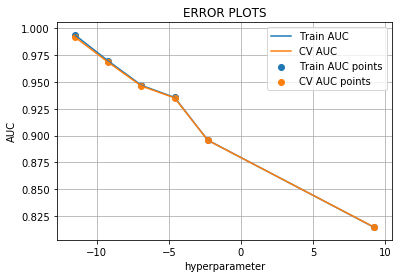

In [83]:
from tqdm import tqdm
import matplotlib.pyplot as plt
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

train_auc1 = []
cv_auc1 = []
A = [0.00001,0.0001,0.001,0.01,0.1,10000]
for i in tqdm(A):
    neigh = SGDClassifier(loss='log',alpha=i,n_iter_no_change=200,n_jobs=-1)
    neigh.fit(X_tr_S1, y_train)
    #y_train_pred=batch_predict(neigh,X_tr_S1)
    #y_cv_pred=batch_predict(neigh,X_cr_S1)
    y_train_pred=neigh.predict_proba(X_tr_S1)[:,1]
    y_cv_pred=neigh.predict_proba(X_cr_S1)[:,1]
    
    train_auc1.append(roc_auc_score(y_train,y_train_pred))
    cv_auc1.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(np.log(A), train_auc1, label='Train AUC')
plt.plot(np.log(A), cv_auc1, label='CV AUC')

plt.scatter(np.log(A), train_auc1, label='Train AUC points')
plt.scatter(np.log(A), cv_auc1, label='CV AUC points')

plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [84]:
bestalpha=0.00001

In [85]:
from sklearn.linear_model import SGDClassifier
LR = SGDClassifier(loss='log',alpha=bestalpha,n_iter_no_change=200,n_jobs=-1)
LR.fit(X_tr_S1, y_train)

y_test_pred = LR.predict(X_te_S1)

In [86]:
df=pd.DataFrame(y_test_pred,columns =['outcome'])
#df.to_csv('red_hat_submission_LOGR.csv', index=False)

In [87]:
df['activity_id']=Test_dat['activity_id']

In [88]:
df=df[['activity_id','outcome']]

In [89]:
df.to_csv('red_hat_submission_LOGR5.csv', index=False)

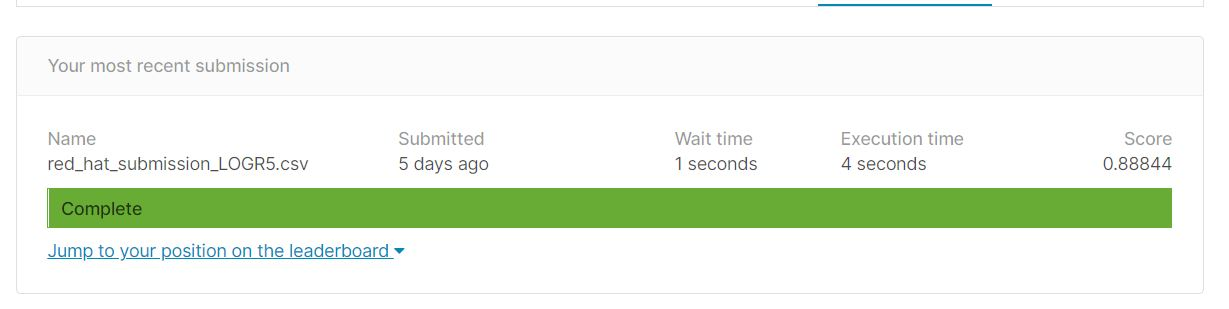

In [1]:
#Kaggle score
from IPython.display import Image, display
display(Image("LogisticRegression_Screenshot.JPG"))

# DecisionTree

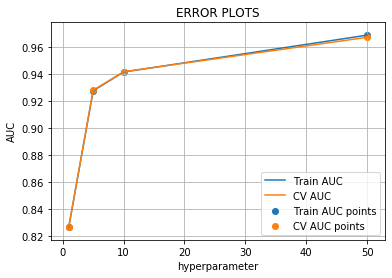

In [85]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


train_auc1 = []
cv_auc1 = []
A = [1, 5, 10, 50]
B = [5, 10, 100, 500]
for (a,b) in zip(A,B):
    dtc = DecisionTreeClassifier(max_depth=a,min_samples_split=b)
    dtc.fit(X_tr_S1, y_train)
    #y_train_pred=batch_predict(neigh,X_tr_S1)
    #y_cv_pred=batch_predict(neigh,X_cr_S1)
    y_train_pred=dtc.predict_proba(X_tr_S1)[:,1]
    y_cv_pred=dtc.predict_proba(X_cr_S1)[:,1]
    
    train_auc1.append(roc_auc_score(y_train,y_train_pred))
    cv_auc1.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(A, train_auc1, label='Train AUC')
plt.plot(A, cv_auc1, label='CV AUC')

plt.scatter(A, train_auc1, label='Train AUC points')
plt.scatter(A, cv_auc1, label='CV AUC points')



plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [87]:
#import plotly.graph_objs as go
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
x1=B
y1=A
Z1=train_auc1
x2=B
y2=A
Z2=cv_auc1
trace1 = go.Scatter3d(x=x1,y=y1,z=Z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=Z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='min_sample_split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [89]:
best_depth=50
bestSample_split=500

In [90]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(max_depth=best_depth,min_samples_split=bestSample_split)

DTC.fit(X_tr_S1, y_train)
#y_train_pred = DTC.predict_proba(X_tr_S1)[:,1]   
y_test_pred = DTC.predict_proba(X_te_S1)[:,1]

In [91]:
df=pd.DataFrame(y_test_pred,columns =['outcome'])
df['activity_id']=Test_dat['activity_id']
df=df[['activity_id','outcome']]
df.to_csv('red_hat_submission_DT.csv', index=False)

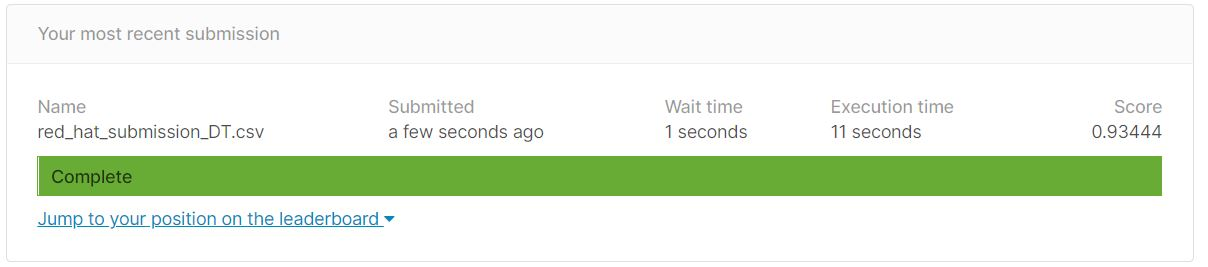

In [2]:
#Kaggle score
from IPython.display import Image, display
display(Image("DecisionTree_Screenshot.JPG"))

# RandomForest

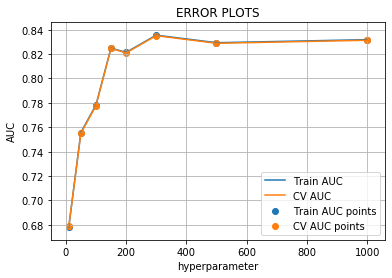

In [83]:
# Please write all the code with proper documentation
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

#from sklearn.calibration import CalibratedClassifierCV

train_auc11 = []
cv_auc11 = []
n_estim = [10, 50, 100, 150, 200, 300, 500, 1000]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for (a,b) in zip(n_estim,max_depth):
    RFC = RandomForestClassifier(n_estimators=a,max_depth=b,class_weight='balanced')
    RFC.fit(X_tr_S1, y_train)
    #y_train_pred=batch_predict(neigh,X_tr_S1)
    #y_cv_pred=batch_predict(neigh,X_cr_S1)
    y_train_pred=RFC.predict_proba(X_tr_S1)[:,1]
    y_cv_pred=RFC.predict_proba(X_cr_S1)[:,1]
    
    train_auc11.append(roc_auc_score(y_train,y_train_pred))
    cv_auc11.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(n_estim, train_auc11, label='Train AUC')
plt.plot(n_estim, cv_auc11, label='CV AUC')

plt.scatter(n_estim, train_auc11, label='Train AUC points')
plt.scatter(n_estim, cv_auc11, label='CV AUC points')



plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [85]:
best_depth=8
bestN_estimators=300

In [86]:
RFC2=RandomForestClassifier(n_estimators=bestN_estimators,max_depth=best_depth,class_weight='balanced')

RFC2.fit(X_tr_S1, y_train)
#y_train_pred = RFC2.predict_proba(X_tr_S1)[:,1]   
y_test_pred = RFC2.predict_proba(X_te_S1)[:,1]

In [88]:
df=pd.DataFrame(y_test_pred,columns =['outcome'])
df['activity_id']=Test_dat['activity_id']
df=df[['activity_id','outcome']]
df.to_csv('red_hat_submission_RF.csv', index=False)

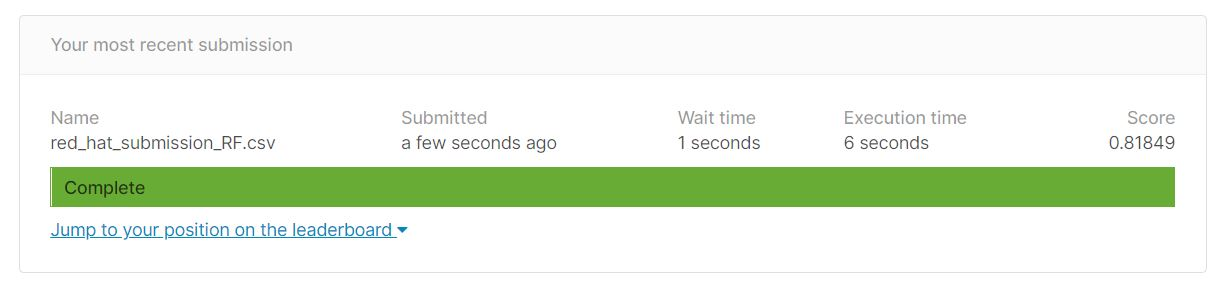

In [3]:
#Kaggle score
from IPython.display import Image, display
display(Image("RandomForest_screenshot.JPG"))

## Adaboost 

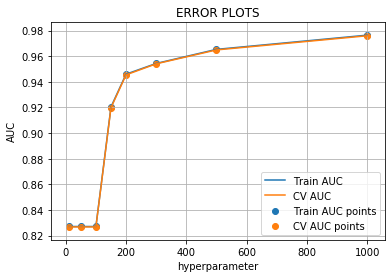

In [86]:
from tqdm import tqdm
import matplotlib.pyplot as plt
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

train_auc1 = []
cv_auc1 = []
n_estim = [10, 50, 100, 150, 200, 300, 500, 1000]
learning_rate = [0.00001,0.0001,0.001,0.01,0.1,0.2,0.5,1.0]
for (a,b) in zip(n_estim,learning_rate):
    neigh = AdaBoostClassifier(n_estimators=a, learning_rate=b)
    neigh.fit(X_tr_S1, y_train)
    #y_train_pred=batch_predict(neigh,X_tr_S1)
    #y_cv_pred=batch_predict(neigh,X_cr_S1)
    y_train_pred=neigh.predict_proba(X_tr_S1)[:,1]
    y_cv_pred=neigh.predict_proba(X_cr_S1)[:,1]
    
    train_auc1.append(roc_auc_score(y_train,y_train_pred))
    cv_auc1.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(n_estim, train_auc1, label='Train AUC')
plt.plot(n_estim, cv_auc1, label='CV AUC')

plt.scatter(n_estim, train_auc1, label='Train AUC points')
plt.scatter(n_estim, cv_auc1, label='CV AUC points')

plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [83]:
best_estimator=1000
best_learning_Rate=1.0

In [84]:
from sklearn.ensemble import AdaBoostClassifier
ADB = AdaBoostClassifier(n_estimators=best_estimator, learning_rate=best_learning_Rate)
ADB.fit(X_tr_S1, y_train)
y_test_pred = ADB.predict_proba(X_te_S1)[:,1]

In [85]:
df=pd.DataFrame(y_test_pred,columns =['outcome'])
df['activity_id']=Test_dat['activity_id']
df=df[['activity_id','outcome']]
df.to_csv('red_hat_submission_ADB.csv', index=False)

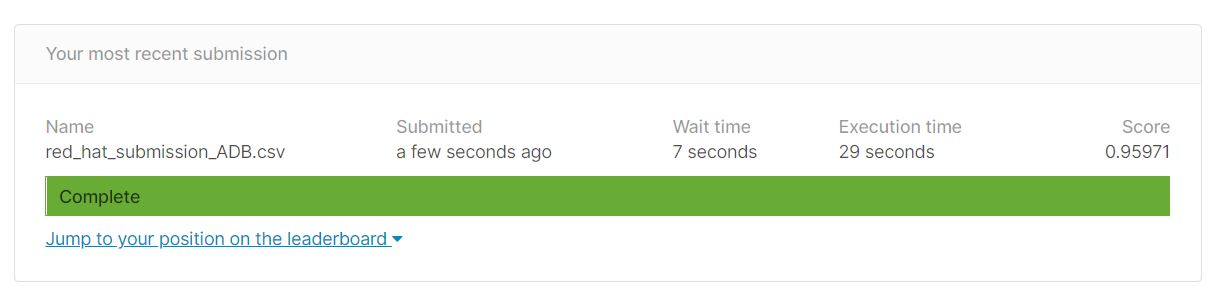

In [86]:
#Kaggle score
from IPython.display import Image, display
display(Image("Adaboost_screenshot.JPG"))

# LightGBM

In [82]:
from sklearn.metrics import roc_auc_score
def lgbmodel(num_leaves,  # int
    min_data_in_leaf,  # int
    learning_rate,
    min_sum_hessian_in_leaf,    # int  
    feature_fraction,
    lambda_l1,
    lambda_l2,
    min_gain_to_split,
    max_depth):
    
    num_leaves = int(num_leaves)
    min_data_in_leaf = int(min_data_in_leaf)
    max_depth = int(max_depth)

    assert type(num_leaves) == int
    assert type(min_data_in_leaf) == int
    assert type(max_depth) == int

    param = {
        'num_leaves': num_leaves,
        'max_bin': 63,
        'min_data_in_leaf': min_data_in_leaf,
        'learning_rate': learning_rate,
        'min_sum_hessian_in_leaf': min_sum_hessian_in_leaf,
        'bagging_fraction': 1.0,
        'bagging_freq': 5,
        'feature_fraction': feature_fraction,
        'lambda_l1': lambda_l1,
        'lambda_l2': lambda_l2,
        'min_gain_to_split': min_gain_to_split,
        'max_depth': max_depth,
        'save_binary': True, 
        'seed': 1337,
        'feature_fraction_seed': 1337,
        'bagging_seed': 1337,
        'drop_seed': 1337,
        'data_random_seed': 1337,
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': -1,
        'metric': 'auc',
        'is_unbalance': False,
        'boost_from_average': False,   

    }    
    
    
    xg_train = lgb.Dataset(X_tr_S1, label=y_train)
    xg_valid = lgb.Dataset(X_cr_S1, label=y_cv)
    num_round = 5000
    clf = lgb.train(param, xg_train, num_round, valid_sets = [xg_valid], verbose_eval=250, early_stopping_rounds = 50)
    
    predictions = clf.predict(X_cr_S1, num_iteration=clf.best_iteration)   
    
    score = roc_auc_score(y_cv, predictions)
    
    return score
    
    


In [83]:
bounds_LGB = {
    'num_leaves': (5, 20), 
    'min_data_in_leaf': (5, 20),  
    'learning_rate': (0.01, 0.3),
    'min_sum_hessian_in_leaf': (0.00001, 0.01),    
    'feature_fraction': (0.05, 0.5),
    'lambda_l1': (0, 5.0), 
    'lambda_l2': (0, 5.0), 
    'min_gain_to_split': (0, 1.0),
    'max_depth':(3,15),
}

In [84]:
from bayes_opt import BayesianOptimization
import lightgbm as lgb
import warnings
LGB_BO = BayesianOptimization(lgbmodel, bounds_LGB, random_state=13)
init_points = 5
n_iter = 5
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    LGB_BO.maximize(init_points=init_points, n_iter=n_iter, acq='ucb', xi=0.0, alpha=1e-6)

|   iter    |  target   | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_da... | min_ga... | min_su... | num_le... |
-------------------------------------------------------------------------------------------------------------------------------------
Training until validation scores don't improve for 50 rounds
[250]	valid_0's auc: 0.9779
[500]	valid_0's auc: 0.983835
[750]	valid_0's auc: 0.986852
[1000]	valid_0's auc: 0.98873
[1250]	valid_0's auc: 0.990014
[1500]	valid_0's auc: 0.991011
[1750]	valid_0's auc: 0.991766
[2000]	valid_0's auc: 0.992369
[2250]	valid_0's auc: 0.992859
[2500]	valid_0's auc: 0.993281
[2750]	valid_0's auc: 0.993593
[3000]	valid_0's auc: 0.9939
[3250]	valid_0's auc: 0.994147
[3500]	valid_0's auc: 0.994351
[3750]	valid_0's auc: 0.994541
[4000]	valid_0's auc: 0.994692
[4250]	valid_0's auc: 0.994839
[4500]	valid_0's auc: 0.994973
[4750]	valid_0's auc: 0.995088
[5000]	valid_0's auc: 0.995198
Did not meet early stopping. Best iteration is:
[5000]	vali

[750]	valid_0's auc: 0.979145
[1000]	valid_0's auc: 0.981895
[1250]	valid_0's auc: 0.983855
[1500]	valid_0's auc: 0.985378


KeyboardInterrupt: 

In [ ]:
LGB_BO.max['target']

In [ ]:
LGB_BO.max['params']

In [87]:
import lightgbm as lgb
lgtrain = lgb.Dataset(X_tr_S1, label=y_train)
lgcv = lgb.Dataset(X_cr_S1, label=y_cv)

In [88]:
del(X_tr_S1)#Deleting variables for freeing memory

In [89]:
del(X_cr_S1)#Deleting variables for freeing memory

In [90]:
#import lightgbm as lgb
param = {
        'num_leaves': int(14.624200171386038),
        'max_bin': 63,
        'min_data_in_leaf': int(11.801738711259683),
        'learning_rate': 0.2900672674324699,
        'min_sum_hessian_in_leaf': 0.007757509880902418,
        'bagging_fraction': 1.0,
        'bagging_freq': 5,
        'feature_fraction': 0.3999660847582191,
        'lambda_l1':1.1877061001745615,
        'lambda_l2': 4.1213926633068425,
        'min_gain_to_split': 0.6090424627612779,
        'max_depth': int(14.67121336685872),
        'save_binary': True, 
        'seed': 1337,
        'feature_fraction_seed': 1337,
        'bagging_seed': 1337,
        'drop_seed': 1337,
        'data_random_seed': 1337,
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': -1,
        'metric': 'auc',
        'is_unbalance': False,
        'boost_from_average': False,   

    }

num_round = 5000

#lgtrain = lgb.Dataset(X_tr_S1, label=y_train)
#lgcv = lgb.Dataset(X_cr_S1, label=y_cv)
model = lgb.train(param, lgtrain,  num_round, valid_sets=[lgcv], early_stopping_rounds=200, verbose_eval=1000)

#pred_test_y = model.predict(X_te_S1, num_iteration=model.best_iteration)

Training until validation scores don't improve for 200 rounds
[1000]	valid_0's auc: 0.988486
[2000]	valid_0's auc: 0.991974
[3000]	valid_0's auc: 0.993545
[4000]	valid_0's auc: 0.994372
[5000]	valid_0's auc: 0.994906
Did not meet early stopping. Best iteration is:
[5000]	valid_0's auc: 0.994906


In [91]:
import joblib

filename = 'finalized_model.pkl'
joblib.dump(model, filename)

['finalized_model.pkl']

In [101]:
pred_test_y = model.predict(X_te_S1, num_iteration=model.best_iteration)

In [102]:
df=pd.DataFrame(pred_test_y,columns =['outcome'])
df['activity_id']=Test_dat['activity_id']
df=df[['activity_id','outcome']]
df.to_csv('red_hat_submission_LGB2.csv', index=False)

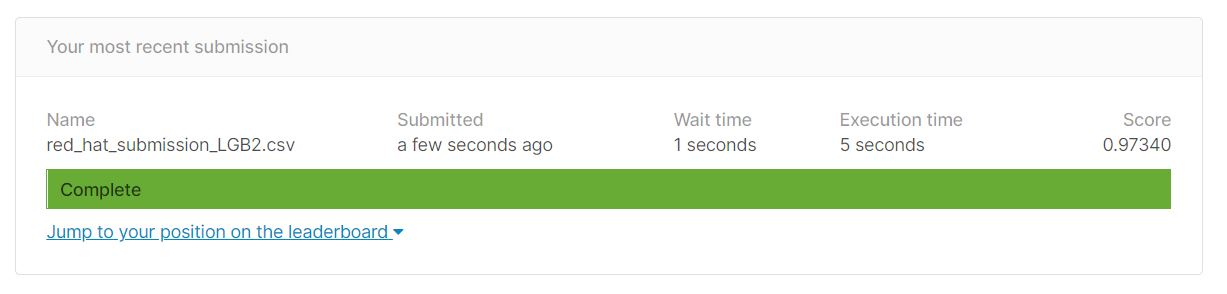

In [4]:
#Kaggle score
from IPython.display import Image, display
display(Image("LightGbm_screenshot.JPG"))

# Conclusion

In [87]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Kaggle_score"]

x.add_row(["Logistic_Regression", 0.88])
x.add_row(["DecisionTree", 0.93])
x.add_row(["RandomForest", 0.81])
x.add_row(["Adaboost", 0.95])
x.add_row(["Lightgbm", 0.97])
print(x)

+---------------------+--------------+
|        Model        | Kaggle_score |
+---------------------+--------------+
| Logistic_Regression |     0.88     |
|     DecisionTree    |     0.93     |
|     RandomForest    |     0.81     |
|       Adaboost      |     0.95     |
|       Lightgbm      |     0.97     |
+---------------------+--------------+
